# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import environmentv6 as e
import seaborn as sns
%matplotlib inline

In [2]:
env = e.Environment(0.40, 9, mining_cost=0.5)
from dqn_agent import Agent
agent = Agent(state_size=2, action_size=3, seed=0)

Episode 1	  Score: -31016.80
0.995


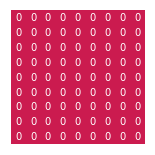

Episode 2	  Score: -31717.00
0.990025


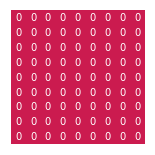

Episode 3	  Score: -30616.20
0.985074875


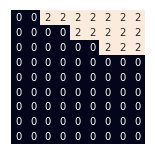

Episode 4	  Score: -29112.40
0.9801495006250001


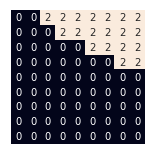

Episode 5	  Score: -28222.60
0.9752487531218751


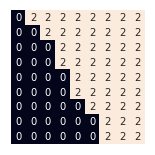

Episode 6	  Score: -28220.40
0.9703725093562657


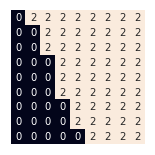

Episode 7	  Score: -32635.40
0.9655206468094844


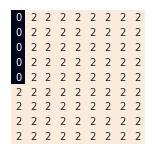

Episode 8	  Score: -30037.80
0.960693043575437


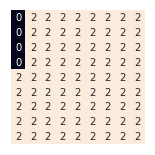

Episode 9	  Score: -26422.60
0.9558895783575597


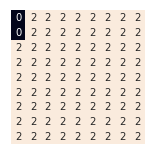

Episode 10	  Score: -29925.00
0.9511101304657719


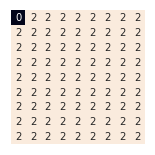

Episode 11	  Score: -29319.40
0.946354579813443


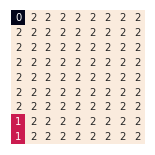

Episode 12	  Score: -27917.40
0.9416228069143757


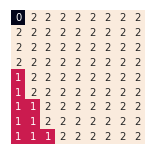

Episode 13	  Score: -26928.00
0.9369146928798039


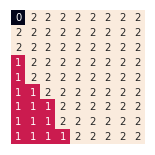

Episode 14	  Score: -28212.80
0.9322301194154049


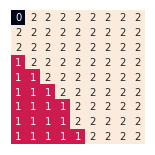

Episode 15	  Score: -27922.20
0.9275689688183278


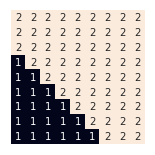

Episode 16	  Score: -29431.80
0.9229311239742362


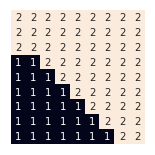

Episode 17	  Score: -27025.20
0.918316468354365


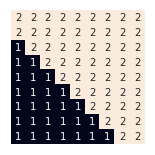

Episode 18	  Score: -27231.20
0.9137248860125932


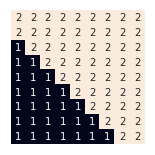

Episode 19	  Score: -25536.00
0.9091562615825302


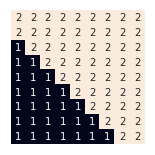

Episode 20	  Score: -27427.80
0.9046104802746175


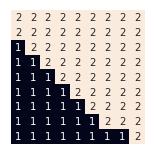

Episode 21	  Score: -26824.20
0.9000874278732445


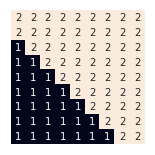

Episode 22	  Score: -28019.40
0.8955869907338783


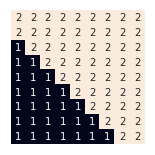

Episode 23	  Score: -26621.00
0.8911090557802088


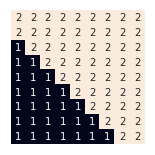

Episode 24	  Score: -25536.20
0.8866535105013078


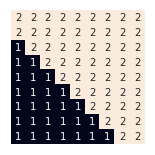

Episode 25	  Score: -25932.00
0.8822202429488013


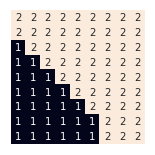

Episode 26	  Score: -28333.20
0.8778091417340573


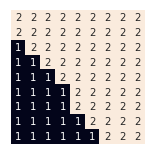

Episode 27	  Score: -27535.80
0.8734200960253871


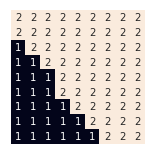

Episode 28	  Score: -23940.60
0.8690529955452602


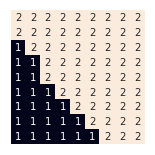

Episode 29	  Score: -24927.00
0.8647077305675338


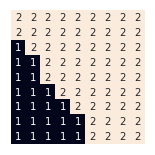

Episode 30	  Score: -24315.60
0.8603841919146962


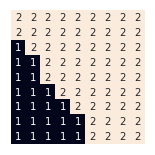

Episode 31	  Score: -23929.60
0.8560822709551227


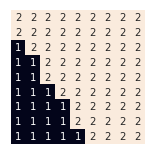

Episode 32	  Score: -25521.80
0.851801859600347


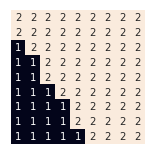

Episode 33	  Score: -21829.20
0.8475428503023453


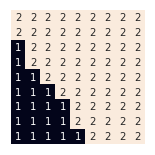

Episode 34	  Score: -23535.00
0.8433051360508336


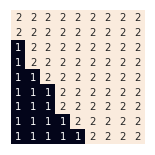

Episode 35	  Score: -23345.80
0.8390886103705794


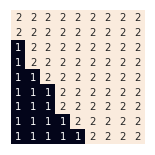

Episode 36	  Score: -23831.60
0.8348931673187264


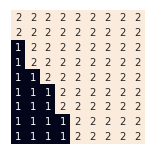

Episode 37	  Score: -23452.40
0.8307187014821328


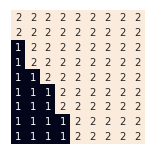

Episode 38	  Score: -23534.60
0.8265651079747222


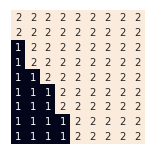

Episode 39	  Score: -22433.60
0.8224322824348486


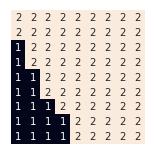

Episode 40	  Score: -25244.40
0.8183201210226743


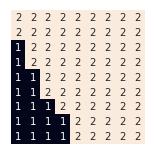

Episode 41	  Score: -22731.20
0.8142285204175609


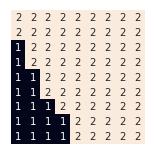

Episode 42	  Score: -23241.60
0.810157377815473


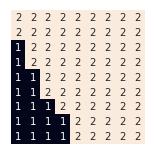

Episode 43	  Score: -23138.60
0.8061065909263957


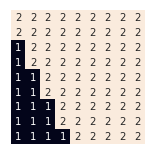

Episode 44	  Score: -23433.20
0.8020760579717637


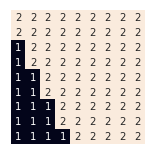

Episode 45	  Score: -22536.00
0.798065677681905


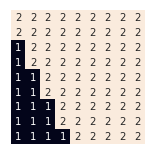

Episode 46	  Score: -21539.40
0.7940753492934954


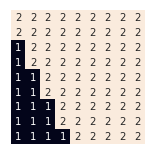

Episode 47	  Score: -24834.60
0.7901049725470279


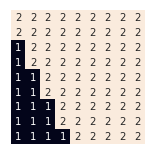

Episode 48	  Score: -19758.00
0.7861544476842928


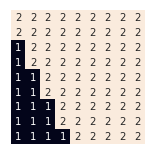

Episode 49	  Score: -20759.80
0.7822236754458713


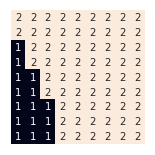

Episode 50	  Score: -22547.60
0.778312557068642


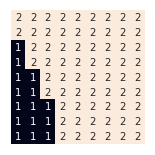

Episode 51	  Score: -21739.20
0.7744209942832988


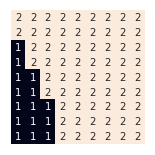

Episode 52	  Score: -20843.00
0.7705488893118823


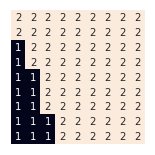

Episode 53	  Score: -21543.60
0.7666961448653229


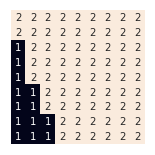

Episode 54	  Score: -20440.20
0.7628626641409962


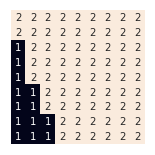

Episode 55	  Score: -22949.20
0.7590483508202912


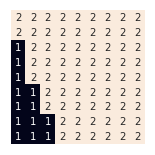

Episode 56	  Score: -19645.80
0.7552531090661897


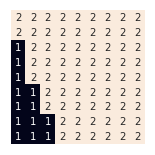

Episode 57	  Score: -20049.60
0.7514768435208588


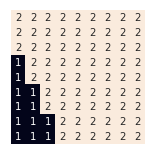

Episode 58	  Score: -22447.60
0.7477194593032545


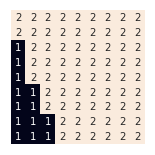

Episode 59	  Score: -17940.80
0.7439808620067382


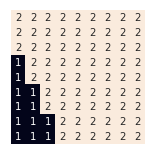

Episode 60	  Score: -21148.40
0.7402609576967045


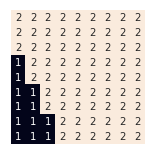

Episode 61	  Score: -21031.40
0.736559652908221


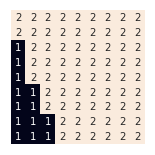

Episode 62	  Score: -21836.20
0.7328768546436799


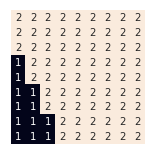

Episode 63	  Score: -20251.00
0.7292124703704616


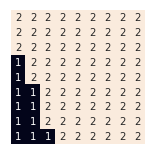

Episode 64	  Score: -19866.00
0.7255664080186093


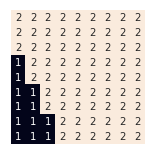

Episode 65	  Score: -20352.80
0.7219385759785162


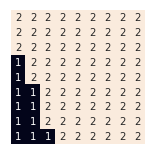

Episode 66	  Score: -20147.40
0.7183288830986236


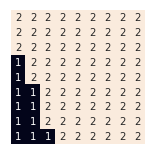

Episode 67	  Score: -21257.60
0.7147372386831305


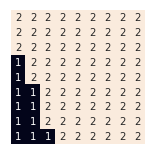

Episode 68	  Score: -19956.20
0.7111635524897149


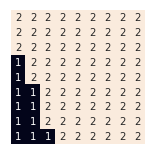

Episode 69	  Score: -20948.00
0.7076077347272662


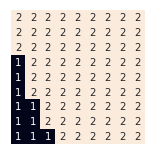

Episode 70	  Score: -23749.40
0.7040696960536299


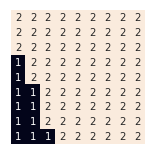

Episode 71	  Score: -22940.00
0.7005493475733617


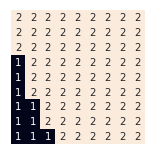

Episode 72	  Score: -19334.80
0.697046600835495


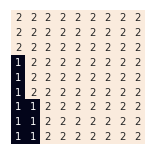

Episode 73	  Score: -18743.60
0.6935613678313175


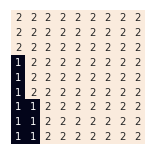

Episode 74	  Score: -19159.00
0.6900935609921609


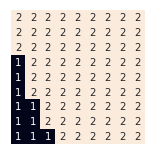

Episode 75	  Score: -19354.00
0.6866430931872001


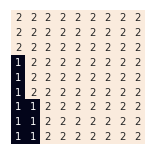

Episode 76	  Score: -18363.60
0.6832098777212641


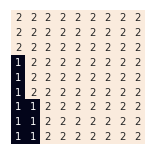

Episode 77	  Score: -17949.20
0.6797938283326578


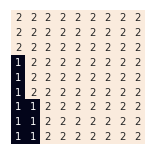

Episode 78	  Score: -17350.20
0.6763948591909945


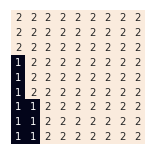

Episode 79	  Score: -17151.00
0.6730128848950395


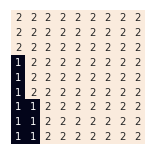

Episode 80	  Score: -15955.00
0.6696478204705644


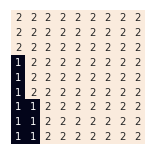

Episode 81	  Score: -19460.20
0.6662995813682115


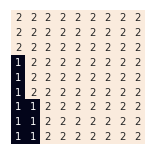

Episode 82	  Score: -19672.40
0.6629680834613705


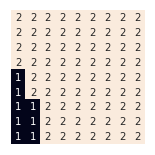

Episode 83	  Score: -17567.20
0.6596532430440636


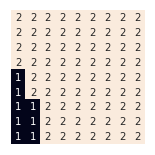

Episode 84	  Score: -17658.00
0.6563549768288433


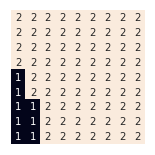

Episode 85	  Score: -18866.20
0.653073201944699


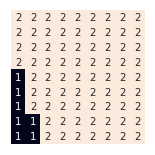

Episode 86	  Score: -18149.80
0.6498078359349755


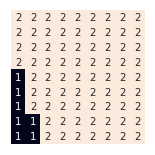

Episode 87	  Score: -16770.40
0.6465587967553006


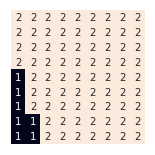

Episode 88	  Score: -16662.00
0.6433260027715241


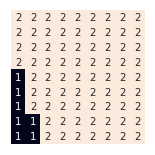

Episode 89	  Score: -16369.20
0.6401093727576664


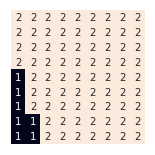

Episode 90	  Score: -18050.80
0.6369088258938781


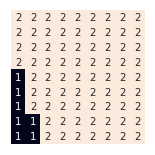

Episode 91	  Score: -18262.00
0.6337242817644086


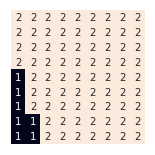

Episode 92	  Score: -18867.60
0.6305556603555866


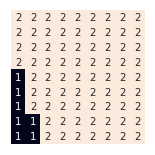

Episode 93	  Score: -18247.20
0.6274028820538087


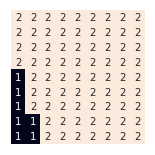

Episode 94	  Score: -17784.00
0.6242658676435396


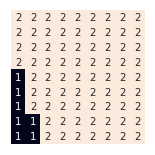

Episode 95	  Score: -15362.80
0.6211445383053219


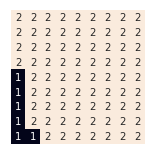

Episode 96	  Score: -14061.40
0.6180388156137953


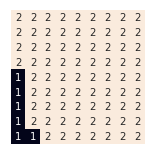

Episode 97	  Score: -16964.80
0.6149486215357263


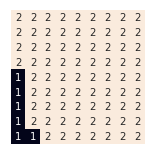

Episode 98	  Score: -16864.20
0.6118738784280476


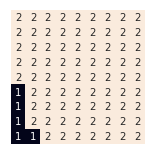

Episode 99	  Score: -18759.60
0.6088145090359074


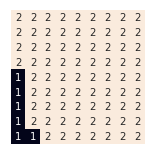

Episode 100	  Score: -15674.80
0.6057704364907278


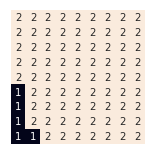

Episode 101	  Score: -15568.60
0.6027415843082742


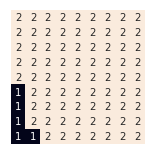

Episode 102	  Score: -14263.00
0.5997278763867329


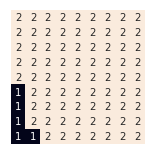

Episode 103	  Score: -15966.80
0.5967292370047992


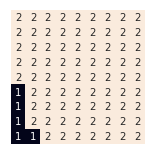

Episode 104	  Score: -13160.80
0.5937455908197752


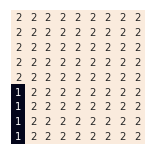

Episode 105	  Score: -16762.60
0.5907768628656763


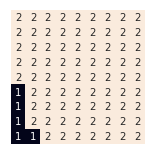

Episode 106	  Score: -16443.80
0.5878229785513479


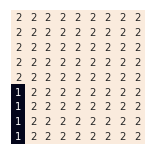

Episode 107	  Score: -16066.60
0.5848838636585911


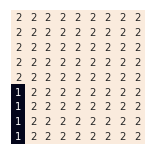

Episode 108	  Score: -15876.20
0.5819594443402982


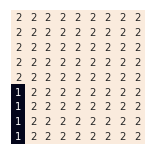

Episode 109	  Score: -13489.40
0.5790496471185967


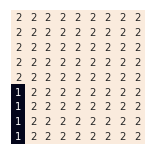

Episode 110	  Score: -18079.60
0.5761543988830038


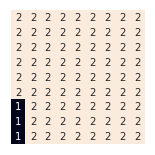

Episode 111	  Score: -13861.80
0.5732736268885887


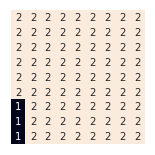

Episode 112	  Score: -13268.80
0.5704072587541458


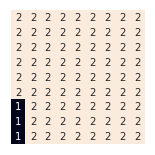

Episode 113	  Score: -14971.00
0.567555222460375


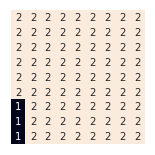

Episode 114	  Score: -18366.80
0.5647174463480732


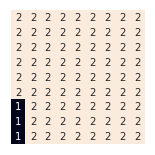

Episode 115	  Score: -15064.00
0.5618938591163328


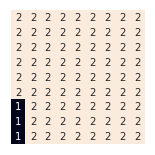

Episode 116	  Score: -14170.00
0.5590843898207511


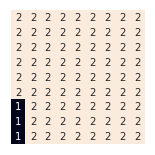

Episode 117	  Score: -14177.00
0.5562889678716474


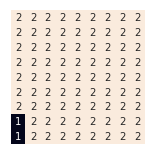

Episode 118	  Score: -13079.80
0.5535075230322891


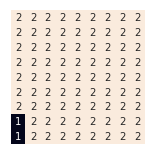

Episode 119	  Score: -14064.00
0.5507399854171277


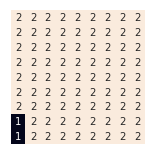

Episode 120	  Score: -15479.00
0.547986285490042


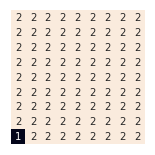

Episode 121	  Score: -15778.60
0.5452463540625918


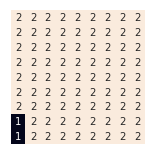

Episode 122	  Score: -14472.80
0.5425201222922789


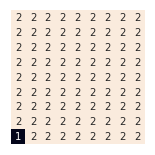

Episode 123	  Score: -15366.20
0.5398075216808175


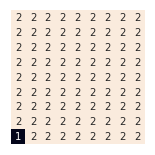

Episode 124	  Score: -14079.80
0.5371084840724134


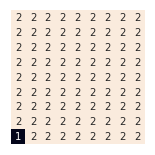

Episode 125	  Score: -14970.00
0.5344229416520513


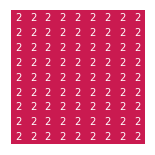

Episode 126	  Score: -14959.40
0.531750826943791


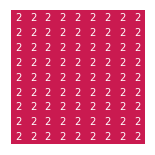

Episode 127	  Score: -14962.20
0.5290920728090721


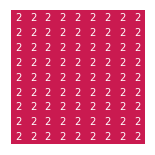

Episode 128	  Score: -14472.80
0.5264466124450268


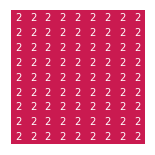

Episode 129	  Score: -13643.80
0.5238143793828016


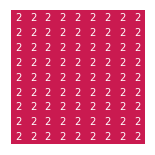

Episode 130	  Score: -14774.80
0.5211953074858876


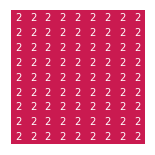

Episode 131	  Score: -15086.00
0.5185893309484582


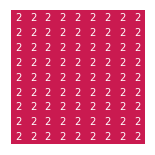

Episode 132	  Score: -14042.00
0.5159963842937159


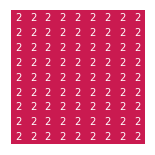

Episode 133	  Score: -13870.20
0.5134164023722473


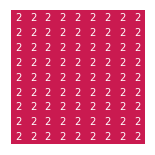

Episode 134	  Score: -13671.80
0.510849320360386


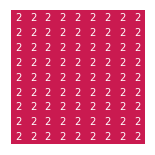

Episode 135	  Score: -14783.80
0.5082950737585841


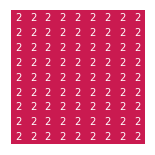

Episode 136	  Score: -12984.20
0.5057535983897912


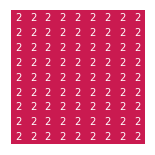

Episode 137	  Score: -13884.20
0.5032248303978422


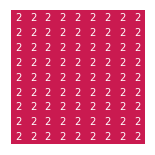

Episode 138	  Score: -14380.60
0.500708706245853


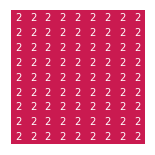

Episode 139	  Score: -12872.40
0.4982051627146237


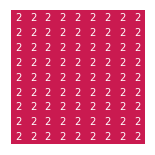

Episode 140	  Score: -14349.80
0.49571413690105054


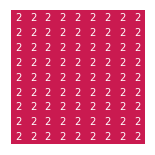

Episode 141	  Score: -13887.00
0.4932355662165453


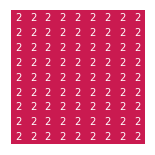

Episode 142	  Score: -11599.00
0.4907693883854626


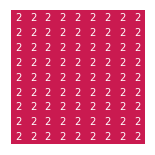

Episode 143	  Score: -13881.60
0.4883155414435353


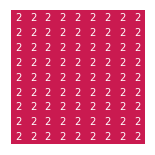

Episode 144	  Score: -16803.20
0.4858739637363176


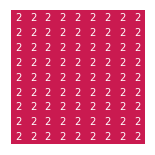

Episode 145	  Score: -10880.60
0.483444593917636


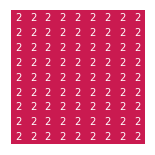

Episode 146	  Score: -12989.40
0.4810273709480478


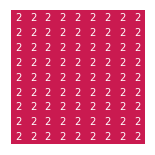

Episode 147	  Score: -13164.00
0.47862223409330756


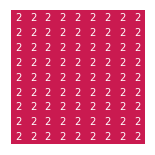

Episode 148	  Score: -13577.60
0.47622912292284103


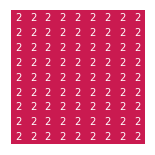

Episode 149	  Score: -13280.20
0.4738479773082268


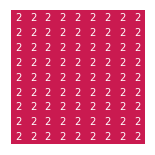

Episode 150	  Score: -11781.40
0.47147873742168567


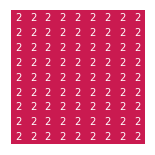

Episode 151	  Score: -11887.00
0.46912134373457726


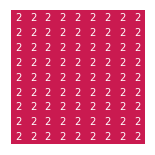

Episode 152	  Score: -14084.20
0.46677573701590436


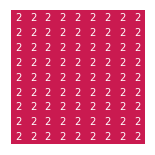

Episode 153	  Score: -11683.00
0.46444185833082485


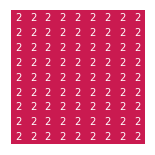

Episode 154	  Score: -14285.60
0.46211964903917074


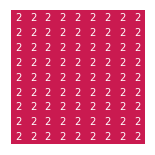

Episode 155	  Score: -12271.60
0.4598090507939749


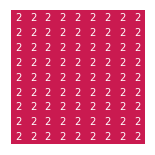

Episode 156	  Score: -11369.80
0.457510005540005


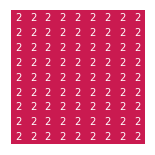

Episode 157	  Score: -12961.80
0.45522245551230495


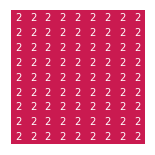

Episode 158	  Score: -12897.40
0.4529463432347434


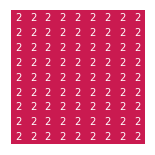

Episode 159	  Score: -12882.00
0.4506816115185697


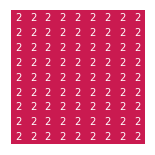

Episode 160	  Score: -10989.40
0.4484282034609769


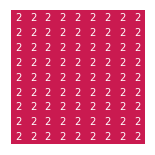

Episode 161	  Score: -13802.80
0.446186062443672


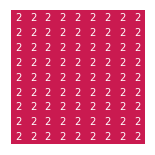

Episode 162	  Score: -11692.40
0.4439551321314536


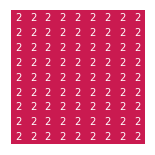

Episode 163	  Score: -10701.40
0.4417353564707963


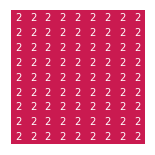

Episode 164	  Score: -10376.80
0.43952667968844233


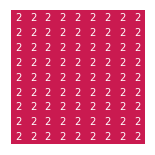

Episode 165	  Score: -10397.40
0.43732904629000013


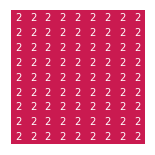

Episode 166	  Score: -12394.00
0.4351424010585501


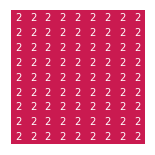

Episode 167	  Score: -11488.00
0.43296668905325736


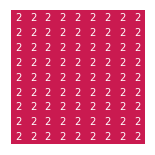

Episode 168	  Score: -12583.80
0.43080185560799106


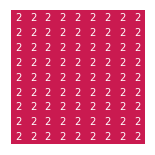

Episode 169	  Score: -12370.80
0.4286478463299511


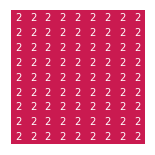

Episode 170	  Score: -10286.00
0.42650460709830135


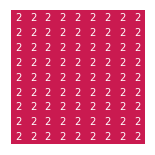

Episode 171	  Score: -11281.60
0.42437208406280985


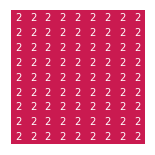

Episode 172	  Score: -11204.00
0.4222502236424958


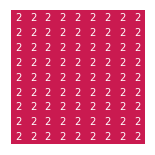

Episode 173	  Score: -10977.00
0.42013897252428334


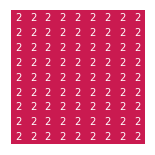

Episode 174	  Score: -12595.80
0.4180382776616619


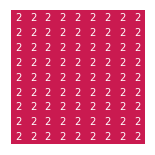

Episode 175	  Score: -11305.00
0.4159480862733536


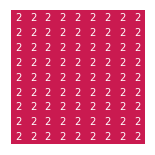

Episode 176	  Score: -10109.80
0.41386834584198684


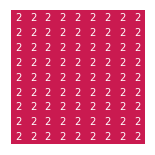

Episode 177	  Score: -9878.20
0.4117990041127769


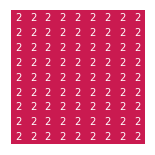

Episode 178	  Score: -10979.00
0.40974000909221303


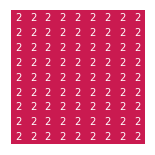

Episode 179	  Score: -11682.40
0.40769130904675194


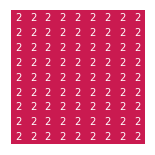

Episode 180	  Score: -13392.40
0.40565285250151817


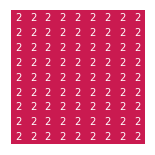

Episode 181	  Score: -11281.40
0.4036245882390106


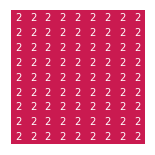

Episode 182	  Score: -10788.00
0.4016064652978155


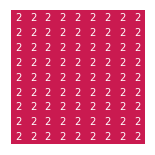

Episode 183	  Score: -9879.20
0.3995984329713264


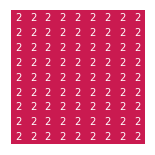

Episode 184	  Score: -11610.20
0.3976004408064698


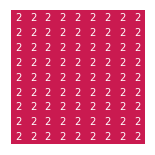

Episode 185	  Score: -12304.60
0.39561243860243744


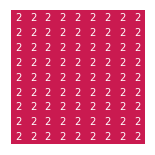

Episode 186	  Score: -11004.40
0.3936343764094253


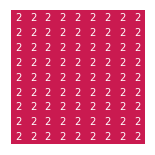

Episode 187	  Score: -9185.00
0.39166620452737816


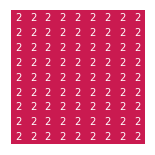

Episode 188	  Score: -9768.40
0.3897078735047413


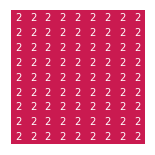

Episode 189	  Score: -9791.60
0.3877593341372176


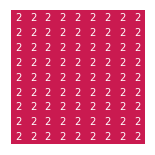

Episode 190	  Score: -11095.20
0.3858205374665315


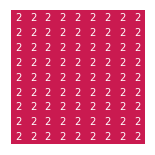

Episode 191	  Score: -8709.80
0.38389143477919885


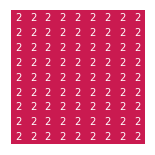

Episode 192	  Score: -10790.20
0.3819719776053028


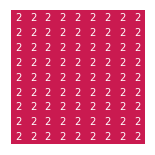

Episode 193	  Score: -10115.40
0.3800621177172763


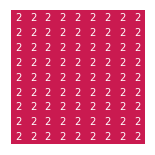

Episode 194	  Score: -10095.00
0.37816180712868996


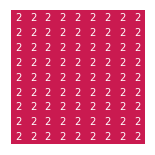

Episode 195	  Score: -9997.20
0.37627099809304654


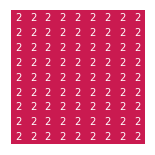

Episode 196	  Score: -9987.80
0.3743896431025813


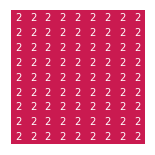

Episode 197	  Score: -8807.80
0.37251769488706843


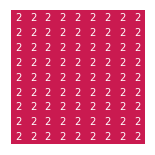

Episode 198	  Score: -8483.80
0.3706551064126331


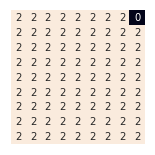

Episode 199	  Score: -10503.60
0.36880183088056995


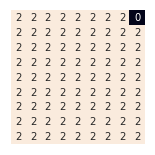

Episode 200	  Score: -10010.00
0.3669578217261671


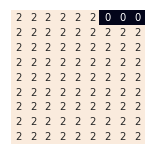

Episode 201	  Score: -9683.80
0.36512303261753626


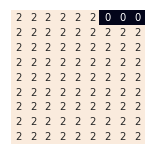

Episode 202	  Score: -9907.00
0.3632974174544486


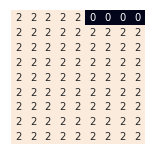

Episode 203	  Score: -9904.00
0.3614809303671764


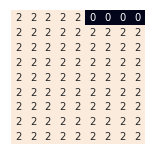

Episode 204	  Score: -8901.20
0.3596735257153405


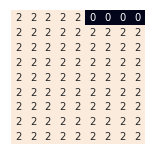

Episode 205	  Score: -8781.80
0.3578751580867638


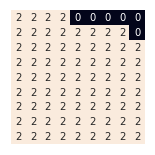

Episode 206	  Score: -10003.00
0.35608578229633


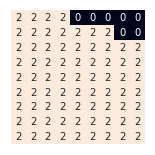

Episode 207	  Score: -9911.60
0.3543053533848483


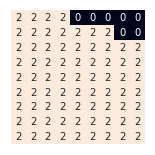

Episode 208	  Score: -10993.40
0.35253382661792404


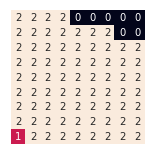

Episode 209	  Score: -9301.40
0.3507711574848344


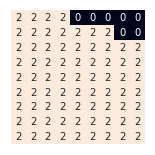

Episode 210	  Score: -7807.00
0.34901730169741024


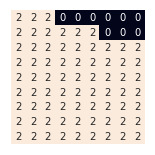

Episode 211	  Score: -8203.40
0.3472722151889232


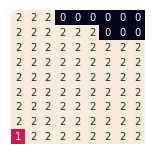

Episode 212	  Score: -8090.20
0.3455358541129786


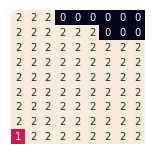

Episode 213	  Score: -8197.40
0.3438081748424137


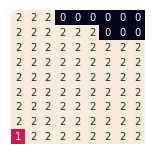

Episode 214	  Score: -7664.20
0.3420891339682016


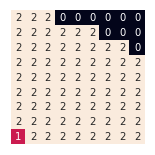

Episode 215	  Score: -7592.60
0.3403786882983606


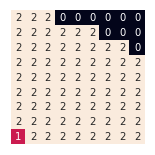

Episode 216	  Score: -7998.00
0.3386767948568688


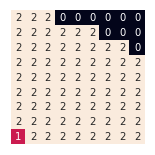

Episode 217	  Score: -7697.60
0.33698341088258443


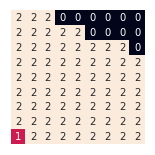

Episode 218	  Score: -8391.20
0.3352984938281715


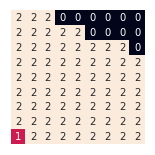

Episode 219	  Score: -7894.60
0.33362200135903064


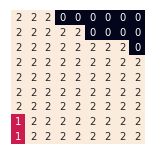

Episode 220	  Score: -9493.60
0.33195389135223546


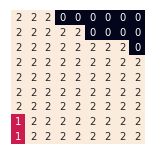

Episode 221	  Score: -8686.60
0.3302941218954743


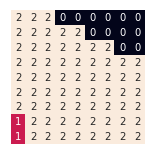

Episode 222	  Score: -9614.40
0.32864265128599696


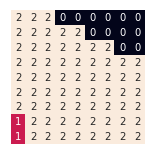

Episode 223	  Score: -8291.40
0.326999438029567


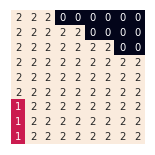

Episode 224	  Score: -8100.60
0.3253644408394192


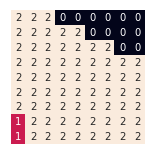

Episode 225	  Score: -9780.60
0.3237376186352221


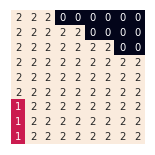

Episode 226	  Score: -9103.20
0.322118930542046


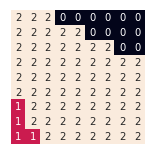

Episode 227	  Score: -8781.20
0.32050833588933575


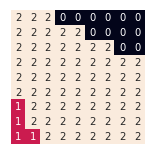

Episode 228	  Score: -7875.60
0.31890579420988907


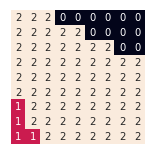

Episode 229	  Score: -7988.20
0.3173112652388396


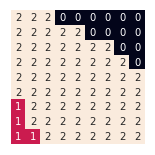

Episode 230	  Score: -9374.40
0.3157247089126454


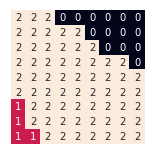

Episode 231	  Score: -7900.60
0.3141460853680822


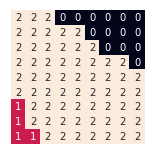

Episode 232	  Score: -7690.60
0.3125753549412418


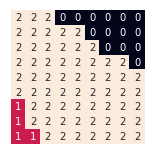

Episode 233	  Score: -7897.40
0.31101247816653554


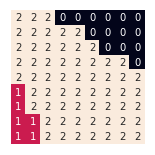

Episode 234	  Score: -8189.00
0.30945741577570285


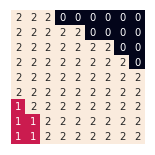

Episode 235	  Score: -8695.20
0.3079101286968243


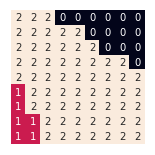

Episode 236	  Score: -7692.40
0.3063705780533402


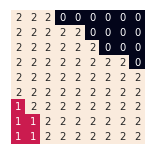

Episode 237	  Score: -6491.40
0.30483872516307353


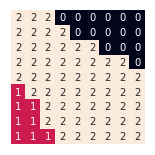

Episode 238	  Score: -8791.00
0.3033145315372582


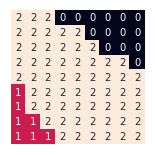

Episode 239	  Score: -7014.40
0.3017979588795719


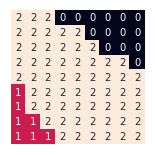

Episode 240	  Score: -7397.20
0.30028896908517405


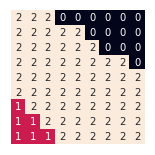

Episode 241	  Score: -7804.80
0.2987875242397482


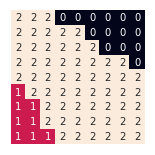

Episode 242	  Score: -7207.00
0.29729358661854943


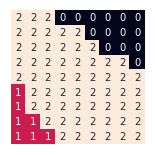

Episode 243	  Score: -7619.20
0.29580711868545667


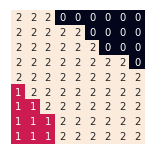

Episode 244	  Score: -7196.60
0.2943280830920294


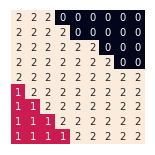

Episode 245	  Score: -7081.40
0.29285644267656924


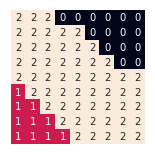

Episode 246	  Score: -6804.60
0.2913921604631864


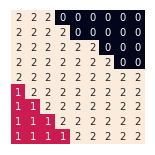

Episode 247	  Score: -6510.60
0.28993519966087045


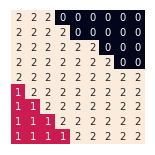

Episode 248	  Score: -6384.00
0.2884855236625661


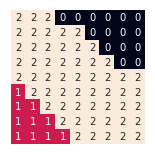

Episode 249	  Score: -8590.00
0.28704309604425327


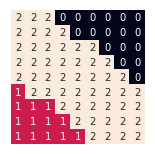

Episode 250	  Score: -7693.80
0.285607880564032


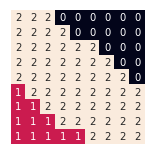

Episode 251	  Score: -8100.80
0.28417984116121187


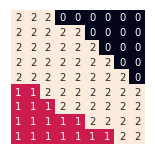

Episode 252	  Score: -7669.00
0.2827589419554058


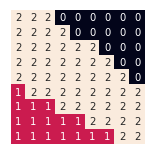

Episode 253	  Score: -8510.20
0.28134514724562876


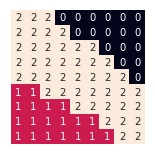

Episode 254	  Score: -6572.80
0.2799384215094006


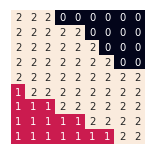

Episode 255	  Score: -7502.00
0.27853872940185365


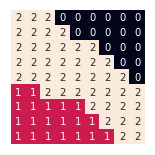

Episode 256	  Score: -6655.20
0.27714603575484437


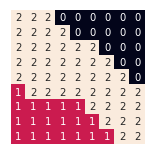

Episode 257	  Score: -6574.60
0.2757603055760701


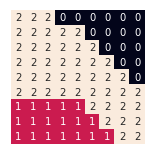

Episode 258	  Score: -6705.20
0.2743815040481898


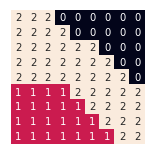

Episode 259	  Score: -7852.40
0.2730095965279488


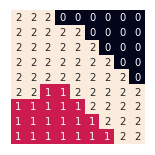

Episode 260	  Score: -8175.60
0.27164454854530906


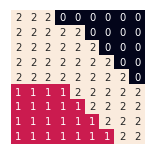

Episode 261	  Score: -8766.00
0.2702863258025825


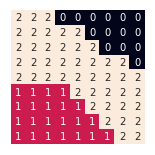

Episode 262	  Score: -7061.60
0.2689348941735696


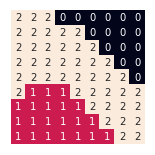

Episode 263	  Score: -6148.00
0.26759021970270175


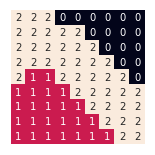

Episode 264	  Score: -7344.20
0.2662522686041882


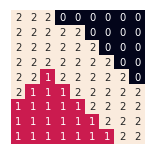

Episode 265	  Score: -7767.20
0.2649210072611673


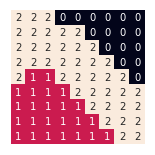

Episode 266	  Score: -6348.40
0.26359640222486147


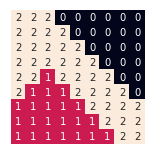

Episode 267	  Score: -7682.60
0.26227842021373715


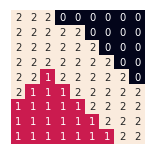

Episode 268	  Score: -7242.00
0.2609670281126685


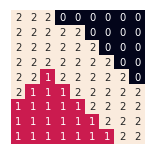

Episode 269	  Score: -6518.40
0.25966219297210513


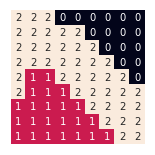

Episode 270	  Score: -6508.60
0.2583638820072446


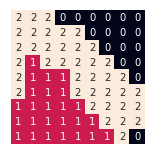

Episode 271	  Score: -6301.40
0.2570720625972084


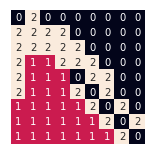

Episode 272	  Score: -8155.00
0.25578670228422234


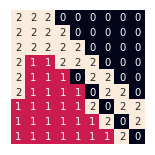

Episode 273	  Score: -6435.80
0.25450776877280124


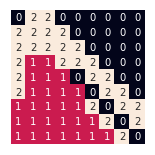

Episode 274	  Score: -8324.60
0.2532352299289372


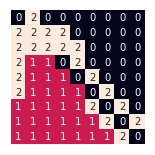

Episode 275	  Score: -7214.60
0.2519690537792925


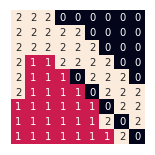

Episode 276	  Score: -6228.80
0.2507092085103961


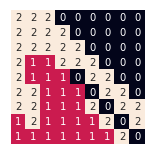

Episode 277	  Score: -5905.80
0.2494556624678441


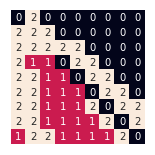

Episode 278	  Score: -7095.60
0.24820838415550486


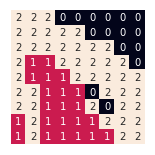

Episode 279	  Score: -6506.60
0.24696734223472733


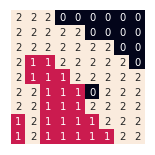

Episode 280	  Score: -5017.80
0.2457325055235537


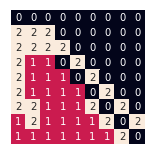

Episode 281	  Score: -6696.60
0.24450384299593592


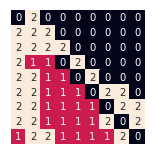

Episode 282	  Score: -6321.40
0.24328132378095624


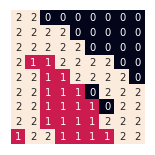

Episode 283	  Score: -7600.20
0.24206491716205145


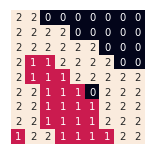

Episode 284	  Score: -6106.60
0.2408545925762412


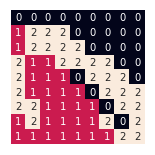

Episode 285	  Score: -5907.80
0.23965031961336


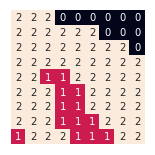

Episode 286	  Score: -5609.40
0.2384520680152932


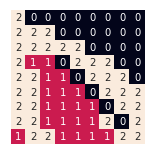

Episode 287	  Score: -5101.00
0.23725980767521673


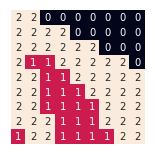

Episode 288	  Score: -5504.20
0.23607350863684065


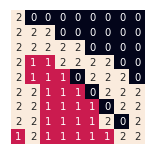

Episode 289	  Score: -5612.20
0.23489314109365644


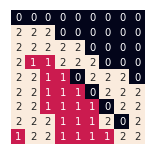

Episode 290	  Score: -7312.80
0.23371867538818816


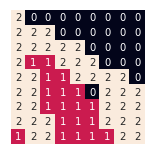

Episode 291	  Score: -5188.80
0.23255008201124722


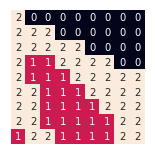

Episode 292	  Score: -5997.60
0.231387331601191


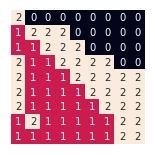

Episode 293	  Score: -5818.60
0.23023039494318503


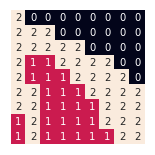

Episode 294	  Score: -6685.60
0.2290792429684691


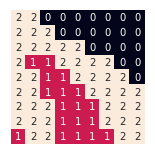

Episode 295	  Score: -5981.60
0.22793384675362674


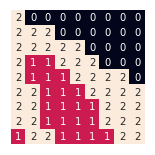

Episode 296	  Score: -5273.20
0.22679417751985861


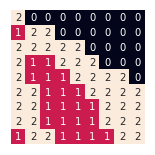

Episode 297	  Score: -4471.20
0.22566020663225933


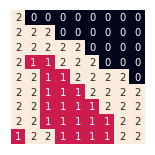

Episode 298	  Score: -4456.20
0.22453190559909803


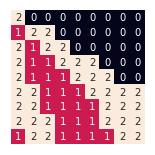

Episode 299	  Score: -5872.40
0.22340924607110255


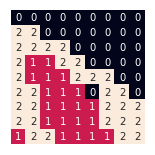

Episode 300	  Score: -5472.60
0.22229219984074702


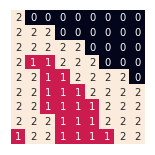

Episode 301	  Score: -6590.20
0.2211807388415433


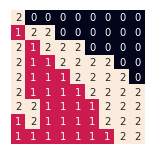

Episode 302	  Score: -6676.40
0.22007483514733558


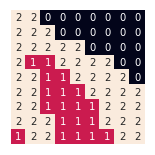

Episode 303	  Score: -4968.40
0.2189744609715989


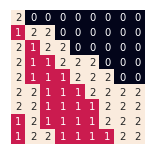

Episode 304	  Score: -6959.80
0.2178795886667409


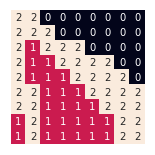

Episode 305	  Score: -5754.20
0.2167901907234072


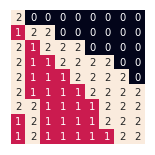

Episode 306	  Score: -5047.60
0.21570623976979014


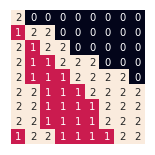

Episode 307	  Score: -5547.20
0.21462770857094118


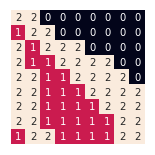

Episode 308	  Score: -5745.40
0.21355457002808648


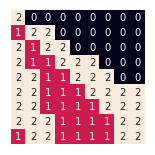

Episode 309	  Score: -5045.40
0.21248679717794605


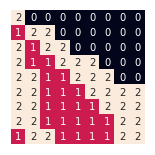

Episode 310	  Score: -5137.60
0.21142436319205632


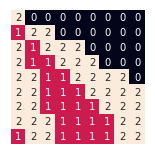

Episode 311	  Score: -5930.40
0.21036724137609603


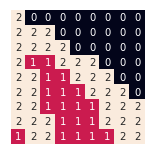

Episode 312	  Score: -5737.60
0.20931540516921554


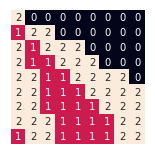

Episode 313	  Score: -5148.80
0.20826882814336947


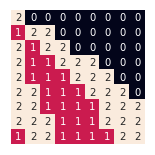

Episode 314	  Score: -5204.40
0.20722748400265262


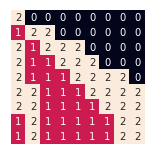

Episode 315	  Score: -5755.20
0.20619134658263935


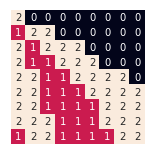

Episode 316	  Score: -5844.20
0.20516038984972615


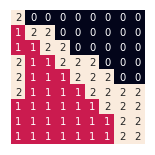

Episode 317	  Score: -5936.80
0.2041345879004775


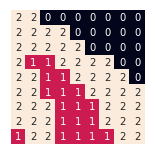

Episode 318	  Score: -4545.40
0.2031139149609751


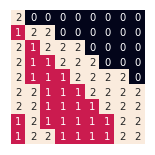

Episode 319	  Score: -5355.40
0.20209834538617025


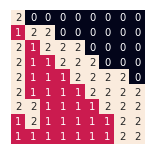

Episode 320	  Score: -8242.40
0.2010878536592394


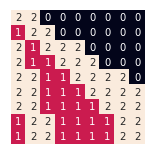

Episode 321	  Score: -5218.20
0.2000824143909432


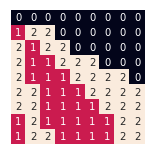

Episode 322	  Score: -5339.60
0.19908200231898848


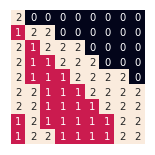

Episode 323	  Score: -4948.00
0.19808659230739353


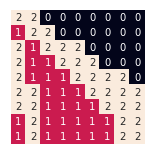

Episode 324	  Score: -4841.40
0.19709615934585656


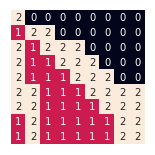

Episode 325	  Score: -5348.20
0.19611067854912728


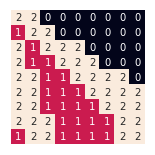

Episode 326	  Score: -5637.60
0.19513012515638165


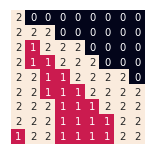

Episode 327	  Score: -5432.40
0.19415447453059972


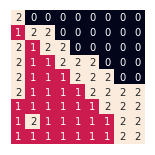

Episode 328	  Score: -5154.60
0.19318370215794672


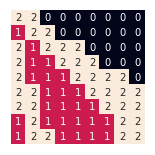

Episode 329	  Score: -5330.20
0.192217783647157


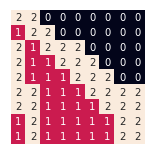

Episode 330	  Score: -5030.60
0.1912566947289212


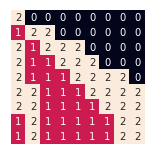

Episode 331	  Score: -4540.80
0.1903004112552766


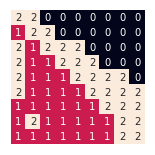

Episode 332	  Score: -4548.80
0.18934890919900021


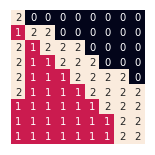

Episode 333	  Score: -5343.00
0.18840216465300522


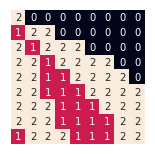

Episode 334	  Score: -4242.60
0.18746015382974018


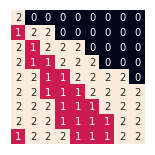

Episode 335	  Score: -5440.40
0.1865228530605915


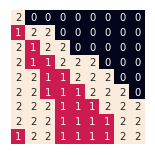

Episode 336	  Score: -5164.00
0.18559023879528855


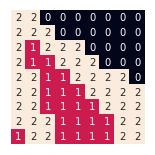

Episode 337	  Score: -6232.60
0.1846622876013121


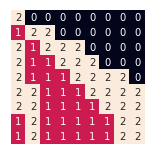

Episode 338	  Score: -5354.80
0.18373897616330553


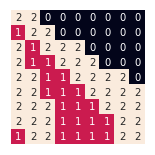

Episode 339	  Score: -3924.60
0.182820281282489


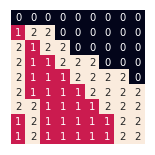

Episode 340	  Score: -6039.60
0.18190617987607657


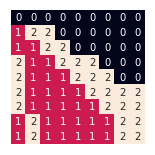

Episode 341	  Score: -4467.80
0.18099664897669618


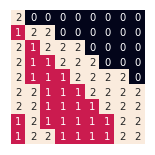

Episode 342	  Score: -5247.40
0.1800916657318127


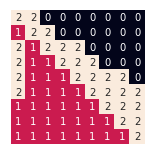

Episode 343	  Score: -4645.40
0.17919120740315364


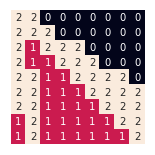

Episode 344	  Score: -4946.40
0.17829525136613786


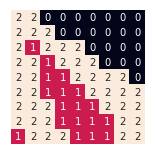

Episode 345	  Score: -4563.60
0.17740377510930716


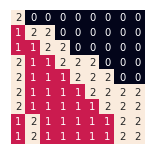

Episode 346	  Score: -5857.40
0.17651675623376062


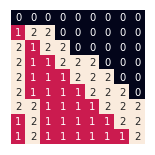

Episode 347	  Score: -5552.60
0.1756341724525918


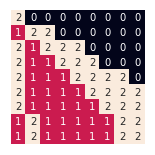

Episode 348	  Score: -5448.40
0.17475600159032884


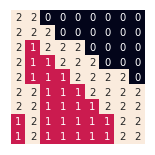

Episode 349	  Score: -5756.80
0.17388222158237718


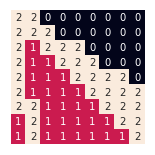

Episode 350	  Score: -4867.00
0.1730128104744653


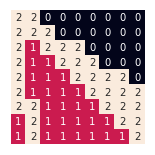

Episode 351	  Score: -4934.40
0.17214774642209296


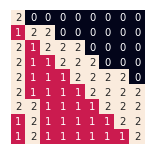

Episode 352	  Score: -4058.20
0.1712870076899825


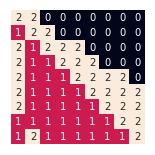

Episode 353	  Score: -5655.00
0.17043057265153258


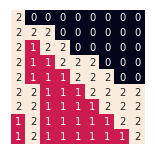

Episode 354	  Score: -3849.60
0.16957841978827493


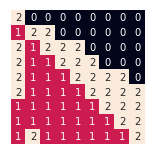

Episode 355	  Score: -5130.00
0.16873052768933355


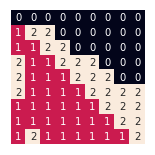

Episode 356	  Score: -4040.00
0.1678868750508869


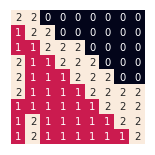

Episode 357	  Score: -3626.20
0.16704744067563246


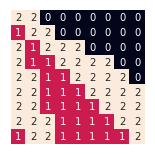

Episode 358	  Score: -5362.00
0.1662122034722543


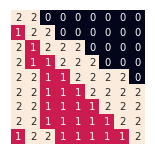

Episode 359	  Score: -3641.20
0.16538114245489302


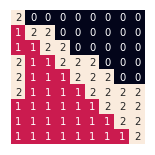

Episode 360	  Score: -4038.60
0.16455423674261854


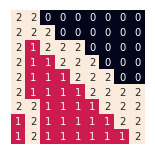

Episode 361	  Score: -4740.40
0.16373146555890544


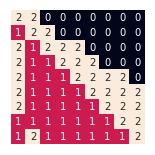

Episode 362	  Score: -4127.80
0.16291280823111093


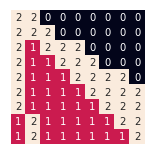

Episode 363	  Score: -4341.40
0.16209824418995536


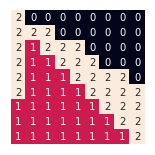

Episode 364	  Score: -4867.40
0.16128775296900558


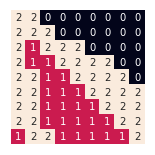

Episode 365	  Score: -3249.40
0.16048131420416054


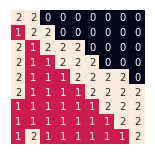

Episode 366	  Score: -3946.60
0.15967890763313974


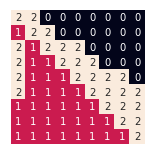

Episode 367	  Score: -4145.60
0.15888051309497406


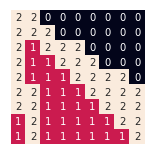

Episode 368	  Score: -5745.20
0.1580861105294992


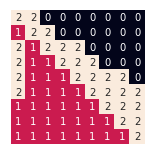

Episode 369	  Score: -3541.80
0.1572956799768517


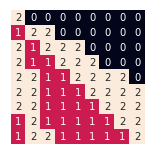

Episode 370	  Score: -5138.20
0.15650920157696743


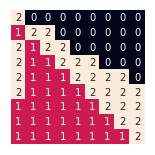

Episode 371	  Score: -4545.80
0.1557266555690826


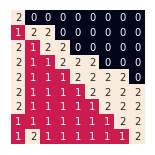

Episode 372	  Score: -3628.80
0.1549480222912372


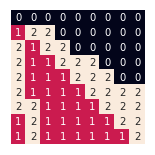

Episode 373	  Score: -3831.80
0.15417328217978102


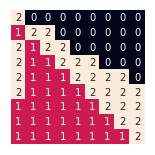

Episode 374	  Score: -3926.60
0.1534024157688821


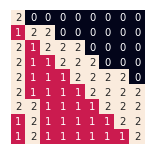

Episode 375	  Score: -3922.40
0.1526354036900377


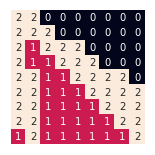

Episode 376	  Score: -4833.00
0.1518722266715875


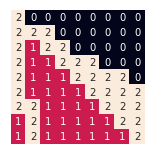

Episode 377	  Score: -2966.80
0.15111286553822956


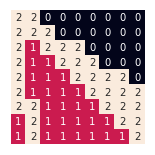

Episode 378	  Score: -3041.00
0.15035730121053842


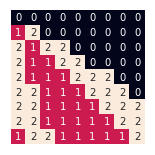

Episode 379	  Score: -4038.40
0.14960551470448571


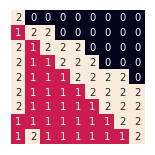

Episode 380	  Score: -4836.60
0.14885748713096328


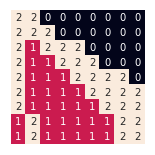

Episode 381	  Score: -3428.20
0.14811319969530845


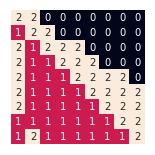

Episode 382	  Score: -3950.80
0.1473726336968319


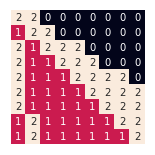

Episode 383	  Score: -4016.40
0.14663577052834775


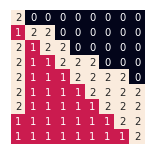

Episode 384	  Score: -4238.80
0.14590259167570602


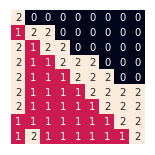

Episode 385	  Score: -2816.40
0.1451730787173275


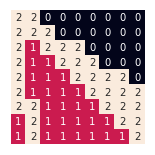

Episode 386	  Score: -3613.00
0.14444721332374086


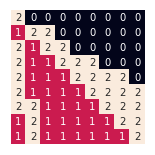

Episode 387	  Score: -3538.40
0.14372497725712216


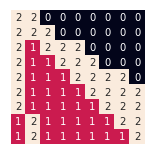

Episode 388	  Score: -4249.20
0.14300635237083656


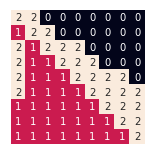

Episode 389	  Score: -3316.20
0.14229132060898236


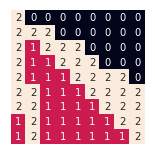

Episode 390	  Score: -4539.40
0.14157986400593744


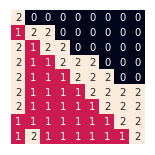

Episode 391	  Score: -4437.00
0.14087196468590776


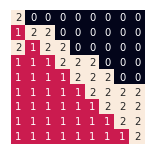

Episode 392	  Score: -3721.20
0.14016760486247823


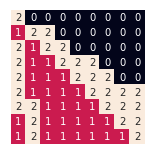

Episode 393	  Score: -4048.00
0.13946676683816583


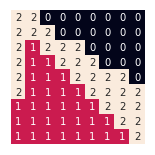

Episode 394	  Score: -3346.60
0.138769433003975


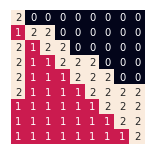

Episode 395	  Score: -3749.60
0.13807558583895513


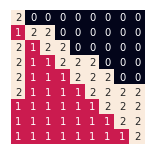

Episode 396	  Score: -4359.20
0.13738520790976036


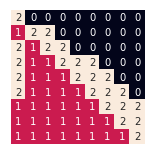

Episode 397	  Score: -3025.40
0.13669828187021155


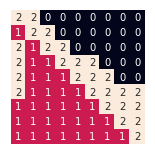

Episode 398	  Score: -3241.60
0.13601479046086049


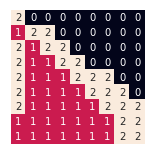

Episode 399	  Score: -3744.40
0.1353347165085562


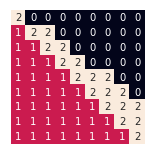

Episode 400	  Score: -4021.80
0.1346580429260134


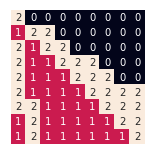

Episode 401	  Score: -3540.60
0.13398475271138335


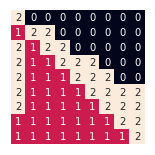

Episode 402	  Score: -4444.80
0.13331482894782642


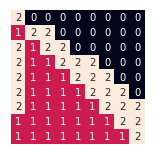

Episode 403	  Score: -3019.20
0.13264825480308728


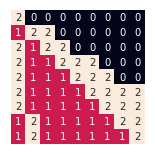

Episode 404	  Score: -4049.00
0.13198501352907185


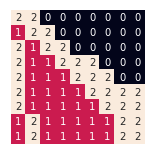

Episode 405	  Score: -3958.20
0.1313250884614265


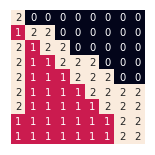

Episode 406	  Score: -3748.20
0.13066846301911936


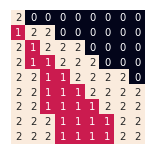

Episode 407	  Score: -3933.20
0.13001512070402377


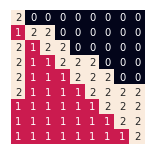

Episode 408	  Score: -3119.00
0.12936504510050365


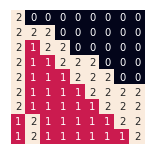

Episode 409	  Score: -3132.60
0.12871821987500112


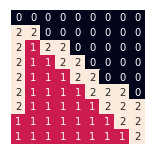

Episode 410	  Score: -3836.00
0.12807462877562611


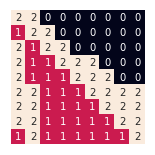

Episode 411	  Score: -3928.60
0.12743425563174798


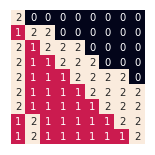

Episode 412	  Score: -2436.40
0.12679708435358925


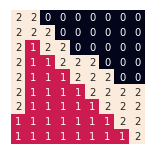

Episode 413	  Score: -3236.20
0.1261630989318213


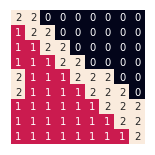

Episode 414	  Score: -2434.60
0.1255322834371622


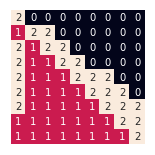

Episode 415	  Score: -3918.80
0.12490462201997637


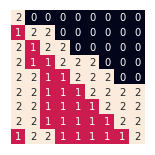

Episode 416	  Score: -3725.80
0.1242800989098765


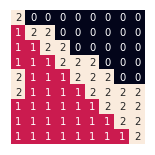

Episode 417	  Score: -2551.60
0.12365869841532712


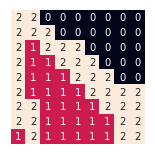

Episode 418	  Score: -3418.20
0.12304040492325048


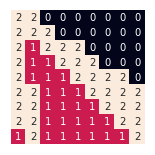

Episode 419	  Score: -4047.80
0.12242520289863423


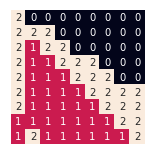

Episode 420	  Score: -3132.60
0.12181307688414106


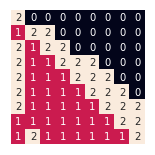

Episode 421	  Score: -3020.40
0.12120401149972035


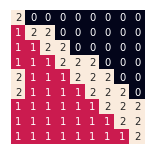

Episode 422	  Score: -1934.00
0.12059799144222175


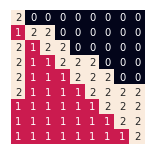

Episode 423	  Score: -2534.80
0.11999500148501063


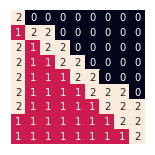

Episode 424	  Score: -4239.80
0.11939502647758558


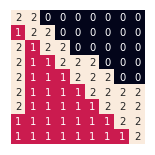

Episode 425	  Score: -3031.20
0.11879805134519765


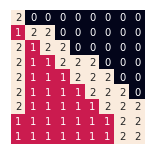

Episode 426	  Score: -3021.00
0.11820406108847166


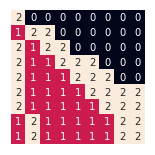

Episode 427	  Score: -4458.20
0.1176130407830293


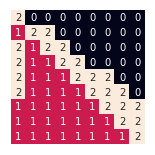

Episode 428	  Score: -3029.40
0.11702497557911415


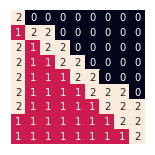

Episode 429	  Score: -3030.40
0.11643985070121858


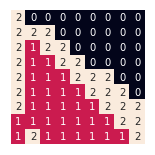

Episode 430	  Score: -2236.80
0.11585765144771248


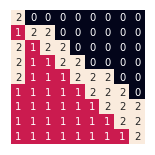

Episode 431	  Score: -3411.20
0.11527836319047392


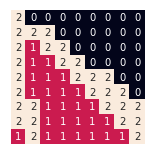

Episode 432	  Score: -2842.00
0.11470197137452155


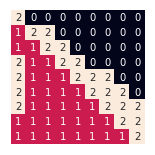

Episode 433	  Score: -3443.40
0.11412846151764894


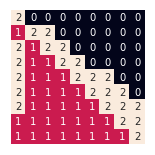

Episode 434	  Score: -3629.80
0.1135578192100607


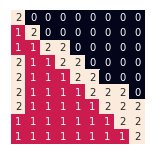

Episode 435	  Score: -2621.80
0.11299003011401039


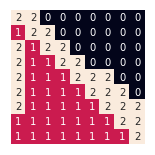

Episode 436	  Score: -3033.00
0.11242507996344034


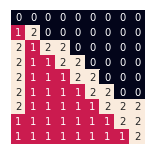

Episode 437	  Score: -3337.80
0.11186295456362313


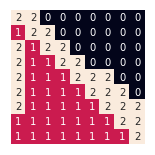

Episode 438	  Score: -3013.80
0.11130363979080501


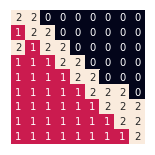

Episode 439	  Score: -2521.00
0.11074712159185099


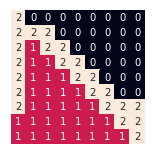

Episode 440	  Score: -2341.60
0.11019338598389174


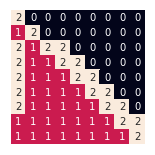

Episode 441	  Score: -2812.80
0.10964241905397228


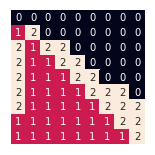

Episode 442	  Score: -3239.40
0.10909420695870241


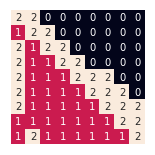

Episode 443	  Score: -2552.20
0.1085487359239089


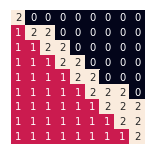

Episode 444	  Score: -2819.80
0.10800599224428936


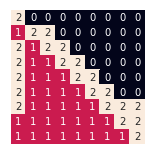

Episode 445	  Score: -2908.40
0.10746596228306791


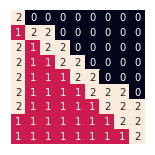

Episode 446	  Score: -2533.00
0.10692863247165257


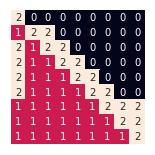

Episode 447	  Score: -3518.40
0.1063939893092943


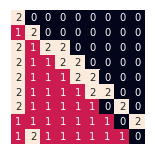

Episode 448	  Score: -2736.00
0.10586201936274783


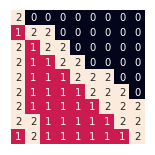

Episode 449	  Score: -2736.40
0.10533270926593409


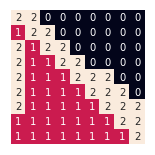

Episode 450	  Score: -3423.20
0.10480604571960442


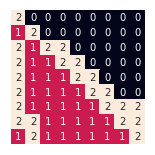

Episode 451	  Score: -2630.40
0.1042820154910064


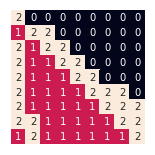

Episode 452	  Score: -2828.60
0.10376060541355137


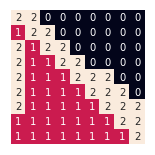

Episode 453	  Score: -2217.20
0.1032418023864836


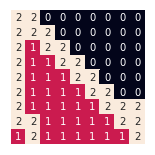

Episode 454	  Score: -2529.00
0.10272559337455119


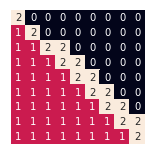

Episode 455	  Score: -2052.80
0.10221196540767843


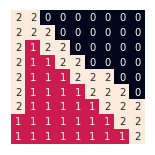

Episode 456	  Score: -2425.20
0.10170090558064004


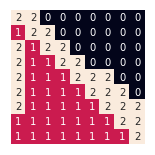

Episode 457	  Score: -2321.60
0.10119240105273684


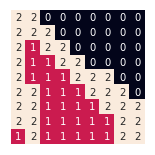

Episode 458	  Score: -2825.20
0.10068643904747315


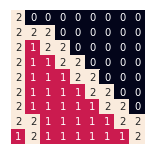

Episode 459	  Score: -2837.00
0.10018300685223579


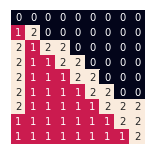

Episode 460	  Score: -1755.20
0.1


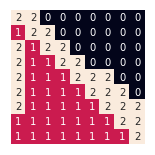

Episode 461	  Score: -3308.00
0.1


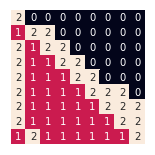

Episode 462	  Score: -3335.00
0.1


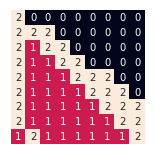

Episode 463	  Score: -3324.00
0.1


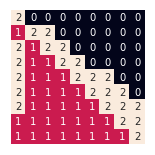

Episode 464	  Score: -2420.40
0.1


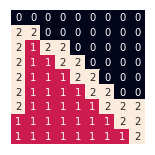

Episode 465	  Score: -2327.40
0.1


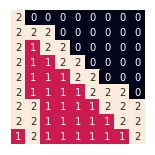

Episode 466	  Score: -1733.00
0.1


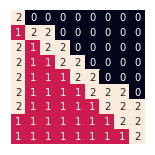

Episode 467	  Score: -2040.80
0.1


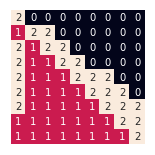

Episode 468	  Score: -3324.40
0.1


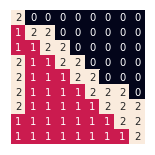

Episode 469	  Score: -2544.40
0.1


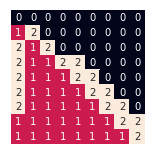

Episode 470	  Score: -2030.40
0.1


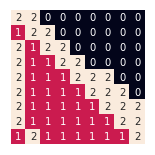

Episode 471	  Score: -2117.40
0.1


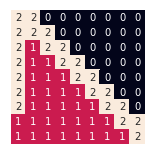

Episode 472	  Score: -2543.60
0.1


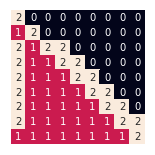

Episode 473	  Score: -1921.60
0.1


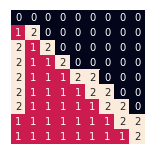

Episode 474	  Score: -3028.40
0.1


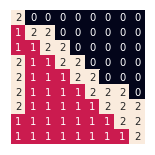

Episode 475	  Score: -2936.60
0.1


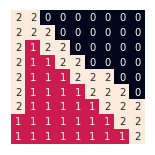

Episode 476	  Score: -3922.80
0.1


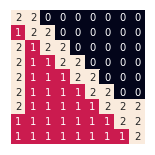

Episode 477	  Score: -2232.40
0.1


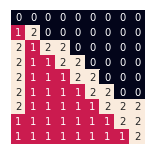

Episode 478	  Score: -2725.60
0.1


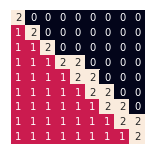

Episode 479	  Score: -2131.20
0.1


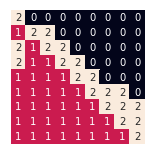

Episode 480	  Score: -2227.60
0.1


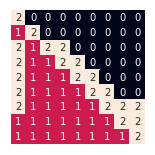

Episode 481	  Score: -4218.00
0.1


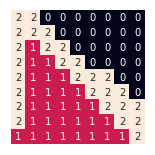

Episode 482	  Score: -3127.20
0.1


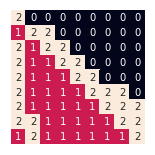

Episode 483	  Score: -3416.40
0.1


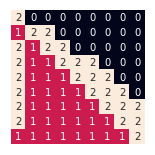

Episode 484	  Score: -2830.60
0.1


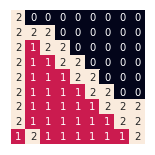

Episode 485	  Score: -2350.60
0.1


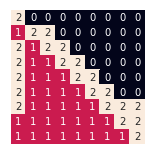

Episode 486	  Score: -2211.80
0.1


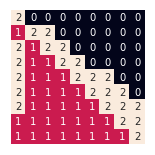

Episode 487	  Score: -3526.80
0.1


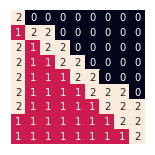

Episode 488	  Score: -2835.60
0.1


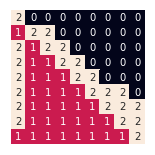

Episode 489	  Score: -2811.40
0.1


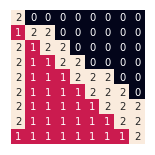

Episode 490	  Score: -2613.20
0.1


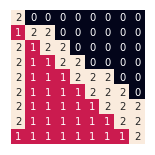

Episode 491	  Score: -1940.60
0.1


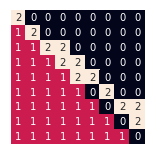

Episode 492	  Score: -2837.00
0.1


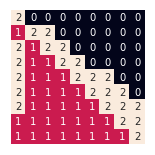

Episode 493	  Score: -2319.20
0.1


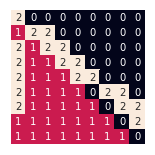

Episode 494	  Score: -2834.00
0.1


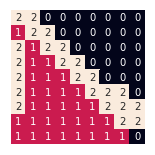

Episode 495	  Score: -3224.40
0.1


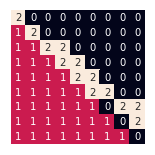

Episode 496	  Score: -3152.20
0.1


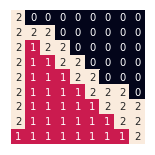

Episode 497	  Score: -3217.00
0.1


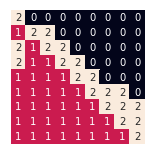

Episode 498	  Score: -2647.60
0.1


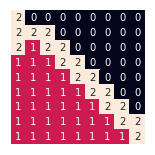

Episode 499	  Score: -2822.00
0.1


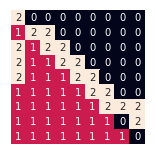

Episode 500	  Score: -2904.60
0.1


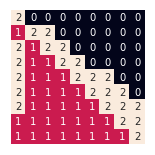

Episode 501	  Score: -3238.80
0.1


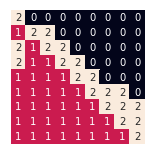

Episode 502	  Score: -2417.60
0.1


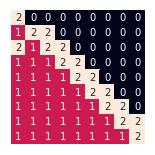

Episode 503	  Score: -1930.60
0.1


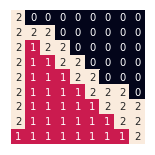

Episode 504	  Score: -2511.20
0.1


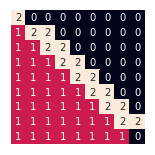

Episode 505	  Score: -2542.60
0.1


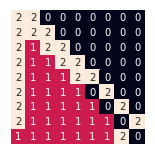

Episode 506	  Score: -2135.20
0.1


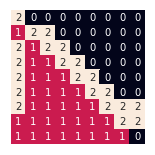

Episode 507	  Score: -2319.60
0.1


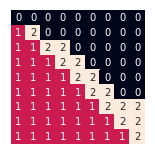

Episode 508	  Score: -2650.20
0.1


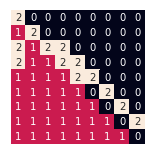

Episode 509	  Score: -2633.40
0.1


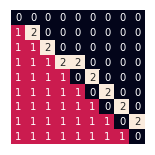

Episode 510	  Score: -2527.00
0.1


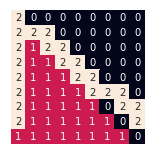

Episode 511	  Score: -2654.80
0.1


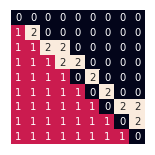

Episode 512	  Score: -2341.60
0.1


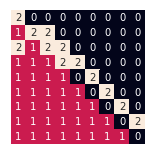

Episode 513	  Score: -2413.80
0.1


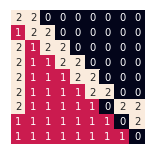

Episode 514	  Score: -2345.60
0.1


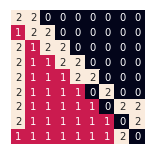

Episode 515	  Score: -3212.00
0.1


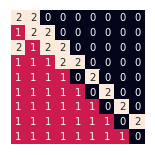

Episode 516	  Score: -2933.40
0.1


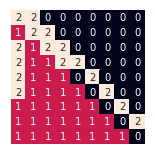

Episode 517	  Score: -2527.00
0.1


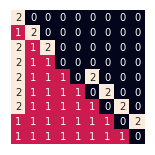

Episode 518	  Score: -2922.00
0.1


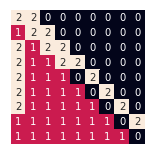

Episode 519	  Score: -3026.00
0.1


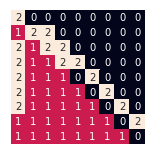

Episode 520	  Score: -2643.40
0.1


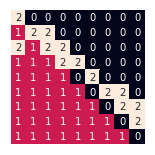

Episode 521	  Score: -2734.00
0.1


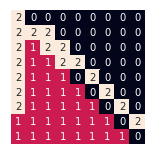

Episode 522	  Score: -2437.40
0.1


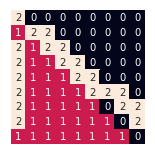

Episode 523	  Score: -2755.00
0.1


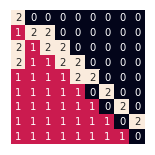

Episode 524	  Score: -2616.20
0.1


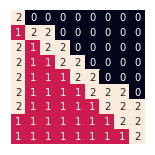

Episode 525	  Score: -2821.00
0.1


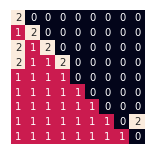

Episode 526	  Score: -2923.40
0.1


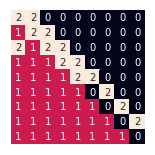

Episode 527	  Score: -3650.40
0.1


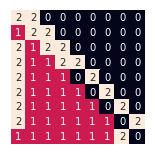

Episode 528	  Score: -2722.00
0.1


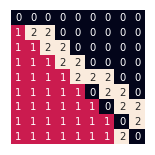

Episode 529	  Score: -2725.40
0.1


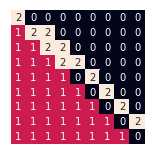

Episode 530	  Score: -4118.00
0.1


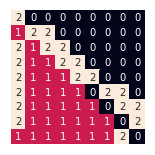

Episode 531	  Score: -3139.20
0.1


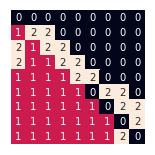

Episode 532	  Score: -2438.80
0.1


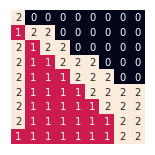

Episode 533	  Score: -2922.60
0.1


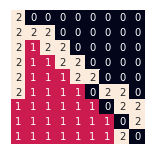

Episode 534	  Score: -1911.20
0.1


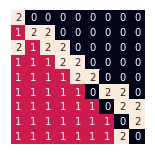

Episode 535	  Score: -1836.80
0.1


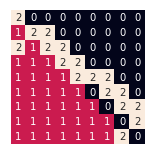

Episode 536	  Score: -2927.20
0.1


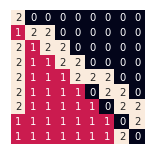

Episode 537	  Score: -2327.00
0.1


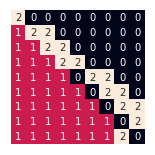

Episode 538	  Score: -2432.00
0.1


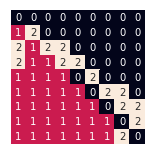

Episode 539	  Score: -2519.20
0.1


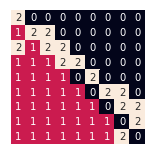

Episode 540	  Score: -2821.00
0.1


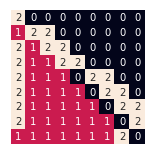

Episode 541	  Score: -2538.40
0.1


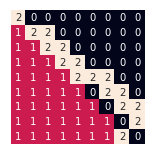

Episode 542	  Score: -3318.60
0.1


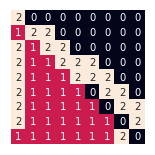

Episode 543	  Score: -2276.80
0.1


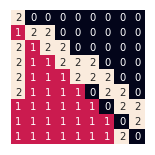

Episode 544	  Score: -2123.20
0.1


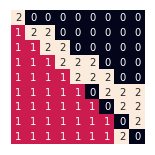

Episode 545	  Score: -2223.20
0.1


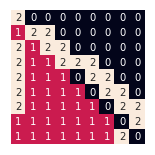

Episode 546	  Score: -2848.20
0.1


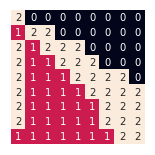

Episode 547	  Score: -3232.80
0.1


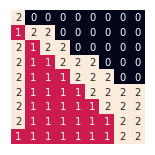

Episode 548	  Score: -2222.40
0.1


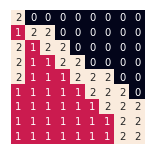

Episode 549	  Score: -2820.00
0.1


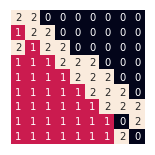

Episode 550	  Score: -2230.40
0.1


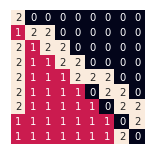

Episode 551	  Score: -2514.60
0.1


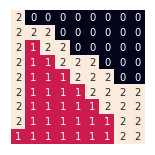

Episode 552	  Score: -2528.80
0.1


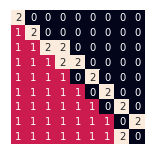

Episode 553	  Score: -2632.00
0.1


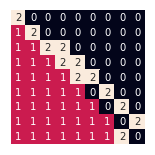

Episode 554	  Score: -2057.60
0.1


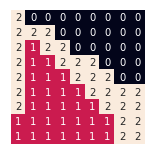

Episode 555	  Score: -2238.80
0.1


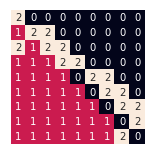

Episode 556	  Score: -1806.40
0.1


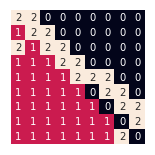

Episode 557	  Score: -3421.20
0.1


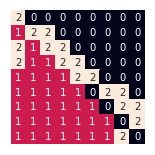

Episode 558	  Score: -2714.60
0.1


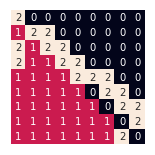

Episode 559	  Score: -3419.60
0.1


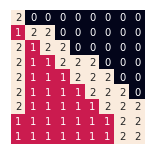

Episode 560	  Score: -3437.60
0.1


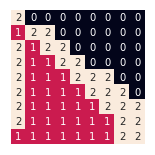

Episode 561	  Score: -2737.80
0.1


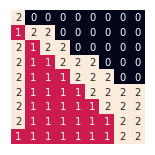

Episode 562	  Score: -2004.80
0.1


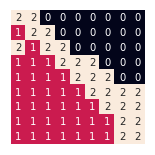

Episode 563	  Score: -2402.80
0.1


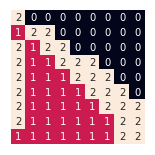

Episode 564	  Score: -3333.80
0.1


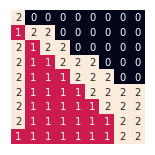

Episode 565	  Score: -1841.00
0.1


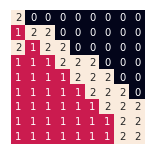

Episode 566	  Score: -3044.80
0.1


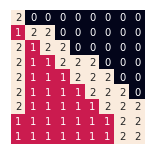

Episode 567	  Score: -2506.80
0.1


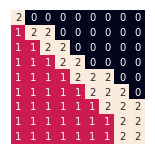

Episode 568	  Score: -2922.00
0.1


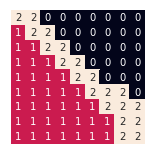

Episode 569	  Score: -2033.20
0.1


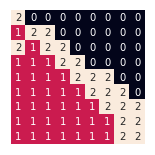

Episode 570	  Score: -2130.80
0.1


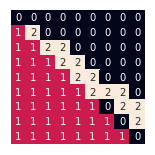

Episode 571	  Score: -2625.40
0.1


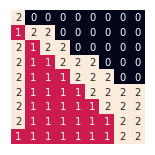

Episode 572	  Score: -2125.60
0.1


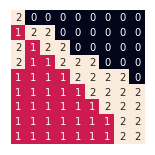

Episode 573	  Score: -3452.80
0.1


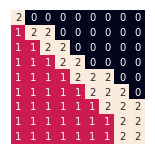

Episode 574	  Score: -2933.40
0.1


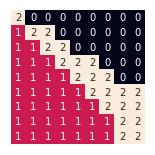

Episode 575	  Score: -3235.00
0.1


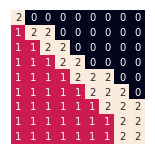

Episode 576	  Score: -2439.20
0.1


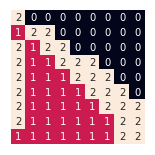

Episode 577	  Score: -2610.80
0.1


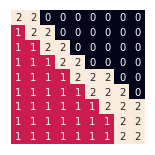

Episode 578	  Score: -2799.80
0.1


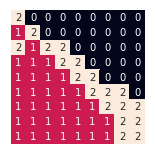

Episode 579	  Score: -2522.40
0.1


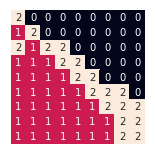

Episode 580	  Score: -3033.60
0.1


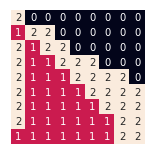

Episode 581	  Score: -3331.60
0.1


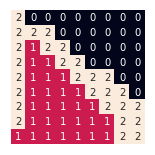

Episode 582	  Score: -1902.60
0.1


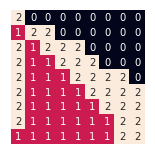

Episode 583	  Score: -2411.20
0.1


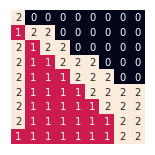

Episode 584	  Score: -2725.40
0.1


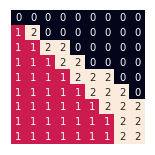

Episode 585	  Score: -2437.00
0.1


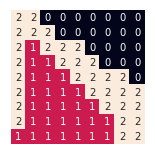

Episode 586	  Score: -2312.60
0.1


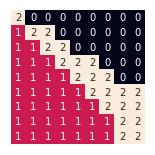

Episode 587	  Score: -2735.80
0.1


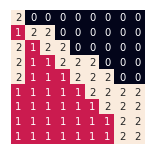

Episode 588	  Score: -2880.40
0.1


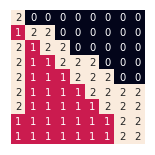

Episode 589	  Score: -2522.00
0.1


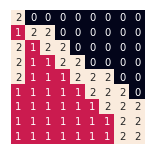

Episode 590	  Score: -2505.40
0.1


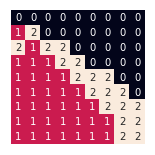

Episode 591	  Score: -3237.00
0.1


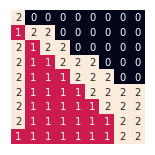

Episode 592	  Score: -3222.20
0.1


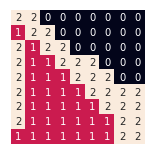

Episode 593	  Score: -2724.40
0.1


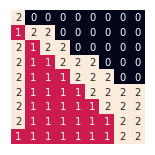

Episode 594	  Score: -2824.60
0.1


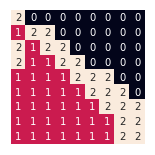

Episode 595	  Score: -2998.00
0.1


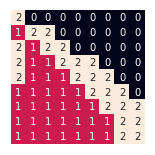

Episode 596	  Score: -2324.00
0.1


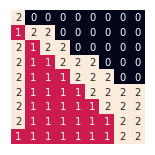

Episode 597	  Score: -1917.60
0.1


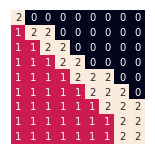

Episode 598	  Score: -2526.00
0.1


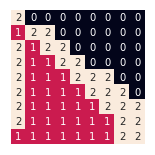

Episode 599	  Score: -3404.20
0.1


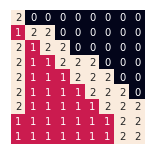

Episode 600	  Score: -3621.40
0.1


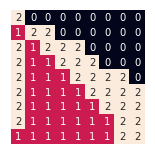

Episode 601	  Score: -2838.60
0.1


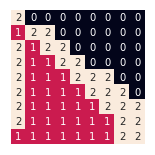

Episode 602	  Score: -2508.00
0.1


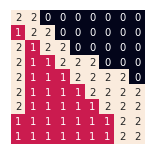

Episode 603	  Score: -3130.60
0.1


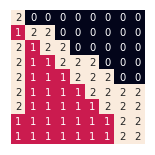

Episode 604	  Score: -2751.80
0.1


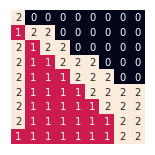

Episode 605	  Score: -2305.20
0.1


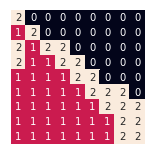

Episode 606	  Score: -2231.80
0.1


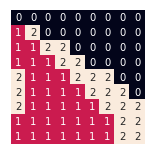

Episode 607	  Score: -2404.40
0.1


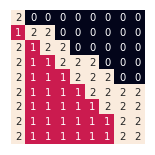

Episode 608	  Score: -2621.00
0.1


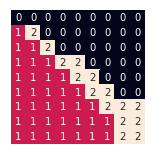

Episode 609	  Score: -3525.80
0.1


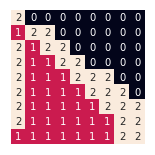

Episode 610	  Score: -2521.40
0.1


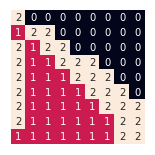

Episode 611	  Score: -2815.60
0.1


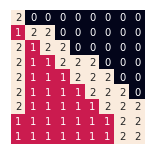

Episode 612	  Score: -3217.00
0.1


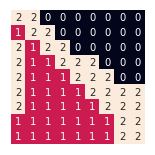

Episode 613	  Score: -3527.20
0.1


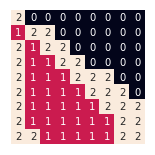

Episode 614	  Score: -2119.20
0.1


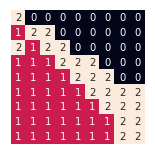

Episode 615	  Score: -2531.40
0.1


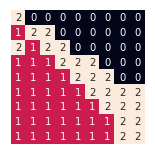

Episode 616	  Score: -2523.40
0.1


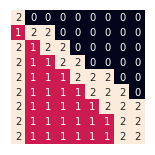

Episode 617	  Score: -2312.40
0.1


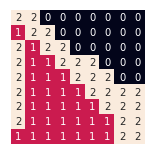

Episode 618	  Score: -2931.60
0.1


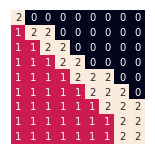

Episode 619	  Score: -2496.00
0.1


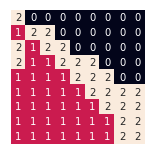

Episode 620	  Score: -1930.20
0.1


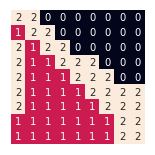

Episode 621	  Score: -2420.20
0.1


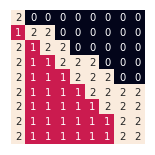

Episode 622	  Score: -2625.80
0.1


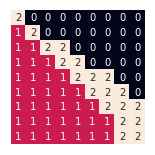

Episode 623	  Score: -2097.60
0.1


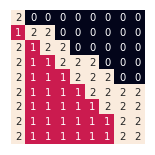

Episode 624	  Score: -2610.20
0.1


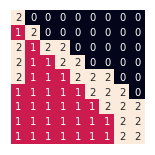

Episode 625	  Score: -1919.80
0.1


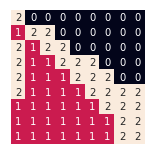

Episode 626	  Score: -3728.00
0.1


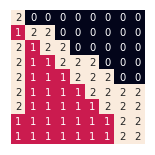

Episode 627	  Score: -2416.40
0.1


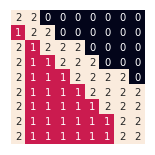

Episode 628	  Score: -2748.40
0.1


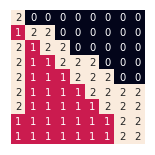

Episode 629	  Score: -2109.20
0.1


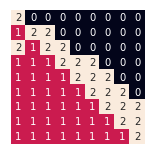

Episode 630	  Score: -2731.20
0.1


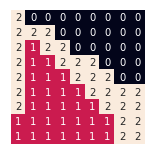

Episode 631	  Score: -2022.20
0.1


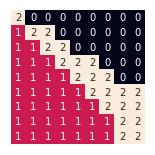

Episode 632	  Score: -3102.40
0.1


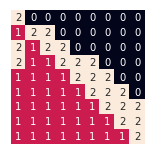

Episode 633	  Score: -2106.40
0.1


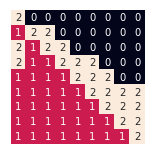

Episode 634	  Score: -2410.80
0.1


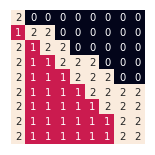

Episode 635	  Score: -2932.20
0.1


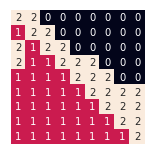

Episode 636	  Score: -2638.00
0.1


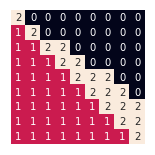

Episode 637	  Score: -2232.00
0.1


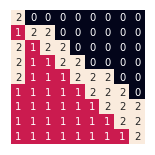

Episode 638	  Score: -2309.80
0.1


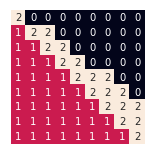

Episode 639	  Score: -2228.20
0.1


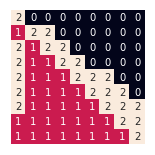

Episode 640	  Score: -2814.40
0.1


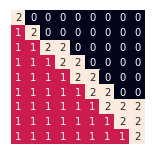

Episode 641	  Score: -1910.20
0.1


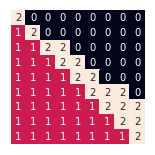

Episode 642	  Score: -2925.60
0.1


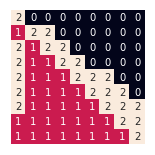

Episode 643	  Score: -2531.20
0.1


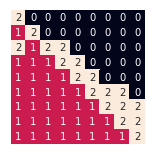

Episode 644	  Score: -2722.40
0.1


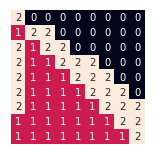

Episode 645	  Score: -2599.20
0.1


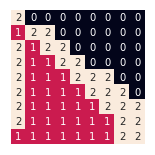

Episode 646	  Score: -2533.40
0.1


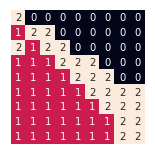

Episode 647	  Score: -1921.80
0.1


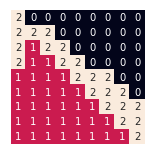

Episode 648	  Score: -2717.40
0.1


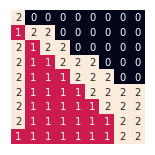

Episode 649	  Score: -2833.40
0.1


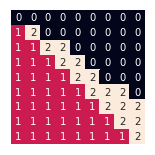

Episode 650	  Score: -3419.40
0.1


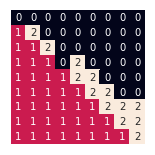

Episode 651	  Score: -2533.00
0.1


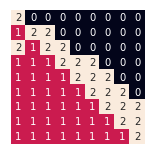

Episode 652	  Score: -2936.60
0.1


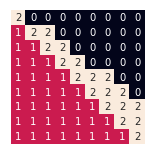

Episode 653	  Score: -2495.00
0.1


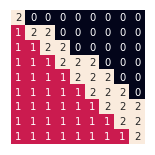

Episode 654	  Score: -2120.00
0.1


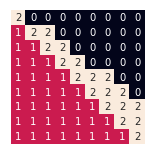

Episode 655	  Score: -2937.20
0.1


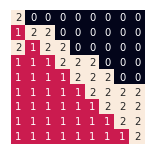

Episode 656	  Score: -2718.80
0.1


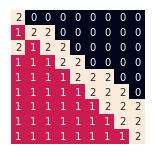

Episode 657	  Score: -3518.60
0.1


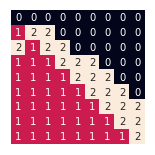

Episode 658	  Score: -2817.40
0.1


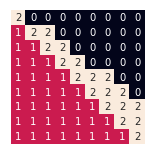

Episode 659	  Score: -1919.40
0.1


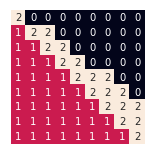

Episode 660	  Score: -2296.00
0.1


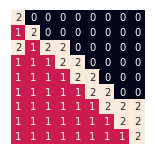

Episode 661	  Score: -2832.20
0.1


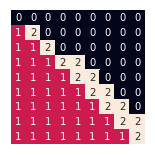

Episode 662	  Score: -2122.80
0.1


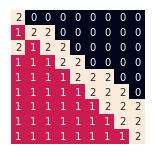

Episode 663	  Score: -3022.40
0.1


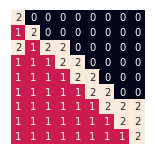

Episode 664	  Score: -2310.80
0.1


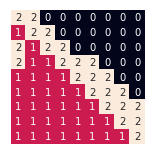

Episode 665	  Score: -3230.00
0.1


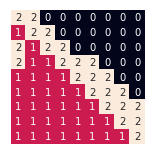

Episode 666	  Score: -3309.40
0.1


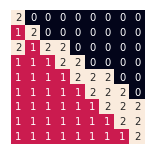

Episode 667	  Score: -3445.80
0.1


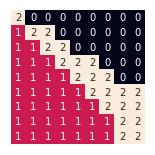

Episode 668	  Score: -2522.20
0.1


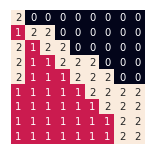

Episode 669	  Score: -3423.80
0.1


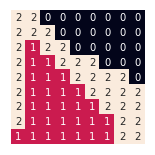

Episode 670	  Score: -3433.40
0.1


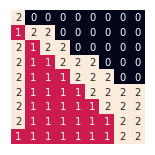

Episode 671	  Score: -2429.20
0.1


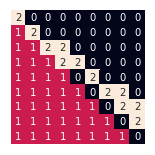

Episode 672	  Score: -2243.40
0.1


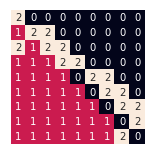

Episode 673	  Score: -2629.40
0.1


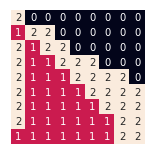

Episode 674	  Score: -3535.60
0.1


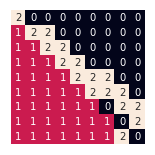

Episode 675	  Score: -3139.80
0.1


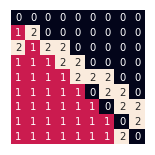

Episode 676	  Score: -2528.00
0.1


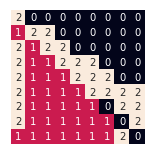

Episode 677	  Score: -2912.60
0.1


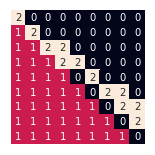

Episode 678	  Score: -2924.40
0.1


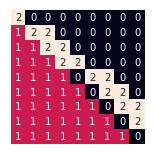

Episode 679	  Score: -2537.80
0.1


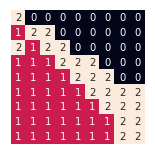

Episode 680	  Score: -2128.20
0.1


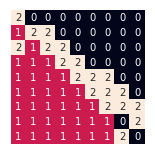

Episode 681	  Score: -2322.00
0.1


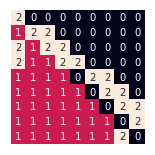

Episode 682	  Score: -2525.60
0.1


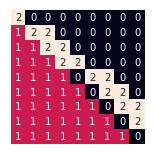

Episode 683	  Score: -2620.60
0.1


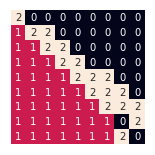

Episode 684	  Score: -2532.00
0.1


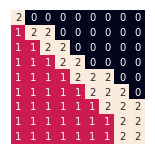

Episode 685	  Score: -2330.40
0.1


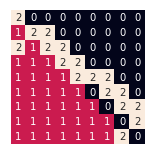

Episode 686	  Score: -2419.00
0.1


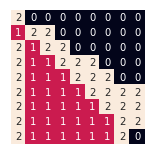

Episode 687	  Score: -2117.80
0.1


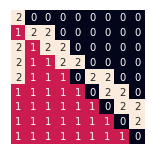

Episode 688	  Score: -3199.00
0.1


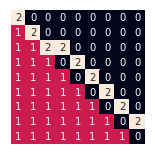

Episode 689	  Score: -2200.20
0.1


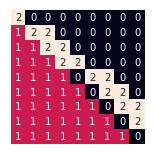

Episode 690	  Score: -1704.20
0.1


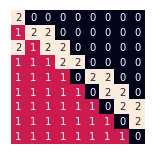

Episode 691	  Score: -3118.20
0.1


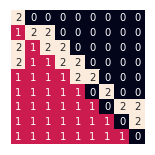

Episode 692	  Score: -4798.00
0.1


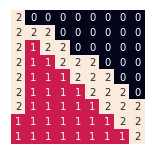

Episode 693	  Score: -3710.60
0.1


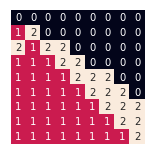

Episode 694	  Score: -2613.60
0.1


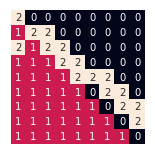

Episode 695	  Score: -2914.20
0.1


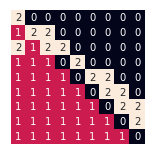

Episode 696	  Score: -3044.40
0.1


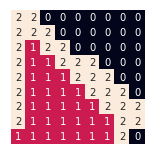

Episode 697	  Score: -1923.40
0.1


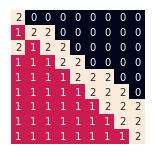

Episode 698	  Score: -2605.60
0.1


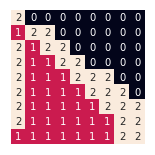

Episode 699	  Score: -3009.40
0.1


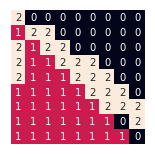

Episode 700	  Score: -2009.20
0.1


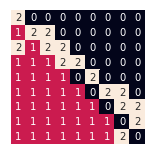

Episode 701	  Score: -3008.60
0.1


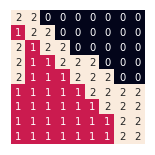

Episode 702	  Score: -1649.20
0.1


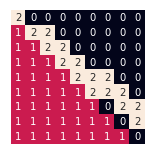

Episode 703	  Score: -1922.40
0.1


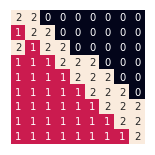

Episode 704	  Score: -1917.20
0.1


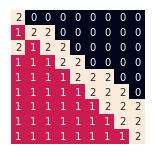

Episode 705	  Score: -4044.80
0.1


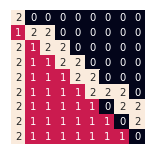

Episode 706	  Score: -3331.00
0.1


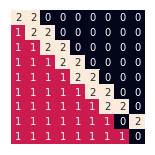

Episode 707	  Score: -3038.80
0.1


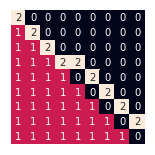

Episode 708	  Score: -3223.00
0.1


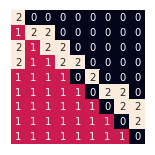

Episode 709	  Score: -3406.80
0.1


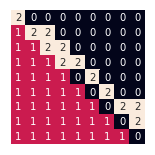

Episode 710	  Score: -2918.20
0.1


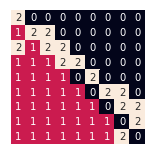

Episode 711	  Score: -2509.60
0.1


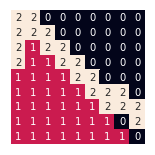

Episode 712	  Score: -2621.60
0.1


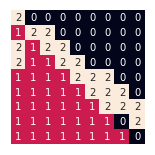

Episode 713	  Score: -2719.20
0.1


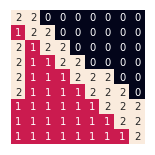

Episode 714	  Score: -3525.40
0.1


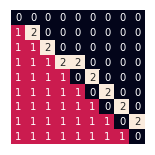

Episode 715	  Score: -2216.20
0.1


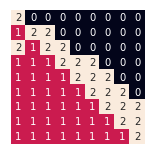

Episode 716	  Score: -3825.60
0.1


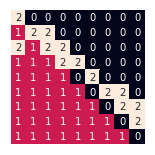

Episode 717	  Score: -3424.40
0.1


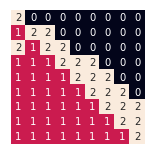

Episode 718	  Score: -2824.20
0.1


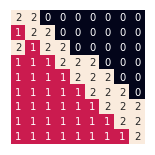

Episode 719	  Score: -2337.00
0.1


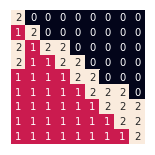

Episode 720	  Score: -3219.20
0.1


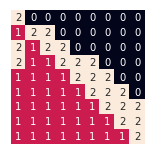

Episode 721	  Score: -2237.00
0.1


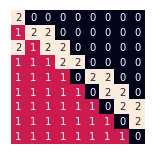

Episode 722	  Score: -2926.60
0.1


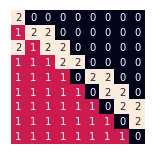

Episode 723	  Score: -2821.00
0.1


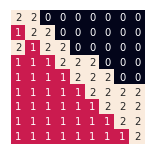

Episode 724	  Score: -2431.20
0.1


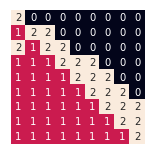

Episode 725	  Score: -2924.20
0.1


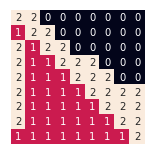

Episode 726	  Score: -3836.40
0.1


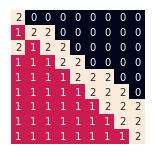

Episode 727	  Score: -1401.80
0.1


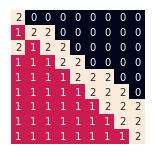

Episode 728	  Score: -3236.40
0.1


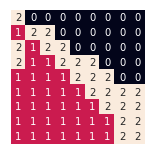

Episode 729	  Score: -2205.40
0.1


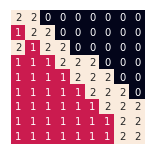

Episode 730	  Score: -2935.20
0.1


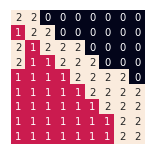

Episode 731	  Score: -3108.40
0.1


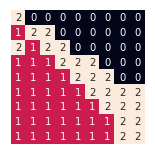

Episode 732	  Score: -2710.60
0.1


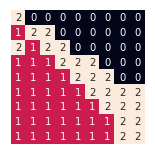

Episode 733	  Score: -2547.20
0.1


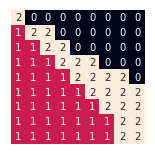

Episode 734	  Score: -2814.80
0.1


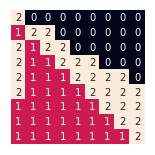

Episode 735	  Score: -1802.60
0.1


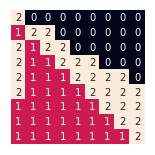

Episode 736	  Score: -2519.00
0.1


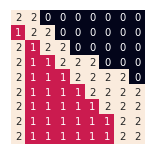

Episode 737	  Score: -2730.80
0.1


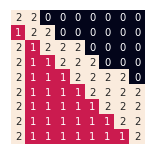

Episode 738	  Score: -2618.80
0.1


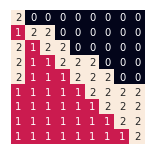

Episode 739	  Score: -3118.80
0.1


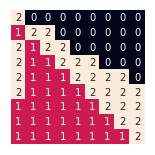

Episode 740	  Score: -3326.60
0.1


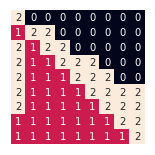

Episode 741	  Score: -2115.00
0.1


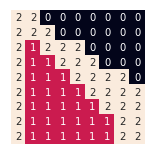

Episode 742	  Score: -2116.80
0.1


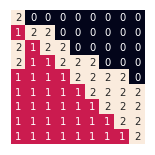

Episode 743	  Score: -2617.20
0.1


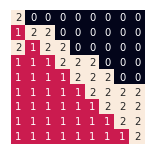

Episode 744	  Score: -2026.60
0.1


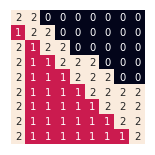

Episode 745	  Score: -3322.40
0.1


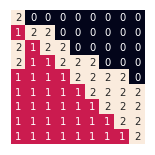

Episode 746	  Score: -3844.20
0.1


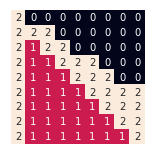

Episode 747	  Score: -2314.60
0.1


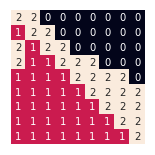

Episode 748	  Score: -2712.40
0.1


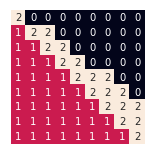

Episode 749	  Score: -3628.00
0.1


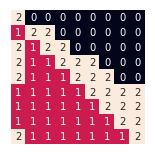

Episode 750	  Score: -3907.00
0.1


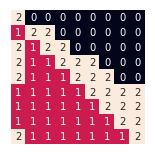

Episode 751	  Score: -2905.60
0.1


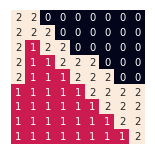

Episode 752	  Score: -2027.60
0.1


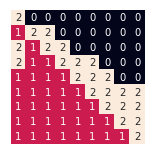

Episode 753	  Score: -2326.20
0.1


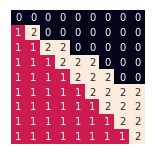

Episode 754	  Score: -2331.20
0.1


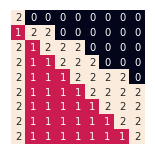

Episode 755	  Score: -2010.20
0.1


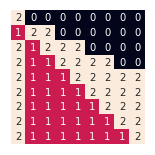

Episode 756	  Score: -3728.20
0.1


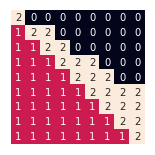

Episode 757	  Score: -3524.40
0.1


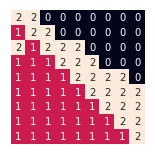

Episode 758	  Score: -2312.00
0.1


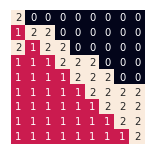

Episode 759	  Score: -2617.00
0.1


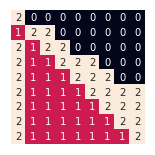

Episode 760	  Score: -2427.80
0.1


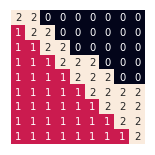

Episode 761	  Score: -2251.20
0.1


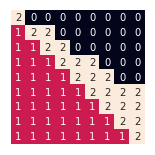

Episode 762	  Score: -2522.40
0.1


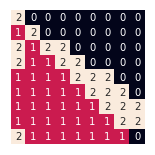

Episode 763	  Score: -3042.80
0.1


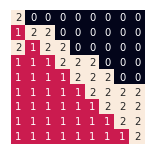

Episode 764	  Score: -2918.40
0.1


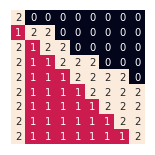

Episode 765	  Score: -3219.20
0.1


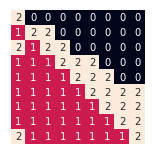

Episode 766	  Score: -2615.60
0.1


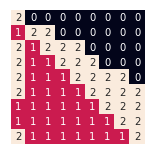

Episode 767	  Score: -2406.20
0.1


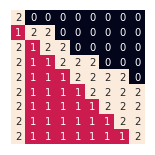

Episode 768	  Score: -2624.40
0.1


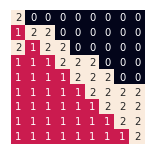

Episode 769	  Score: -2412.60
0.1


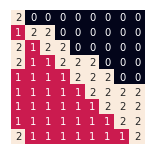

Episode 770	  Score: -1826.40
0.1


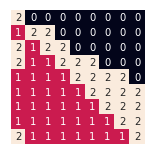

Episode 771	  Score: -2516.20
0.1


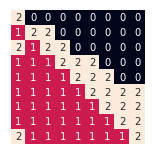

Episode 772	  Score: -2114.60
0.1


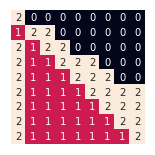

Episode 773	  Score: -2328.60
0.1


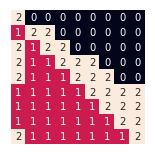

Episode 774	  Score: -1701.60
0.1


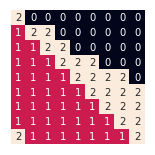

Episode 775	  Score: -1815.00
0.1


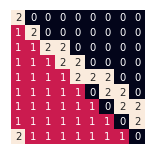

Episode 776	  Score: -3218.20
0.1


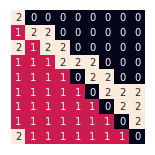

Episode 777	  Score: -2640.60
0.1


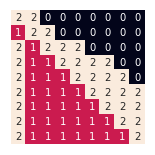

Episode 778	  Score: -1608.20
0.1


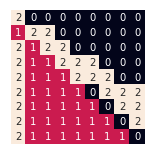

Episode 779	  Score: -2333.40
0.1


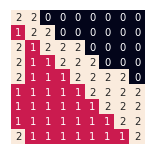

Episode 780	  Score: -2313.40
0.1


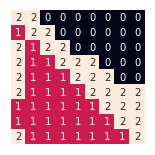

Episode 781	  Score: -2822.60
0.1


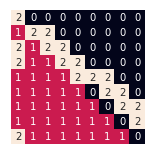

Episode 782	  Score: -2116.00
0.1


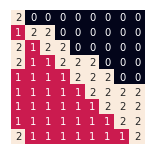

Episode 783	  Score: -1529.40
0.1


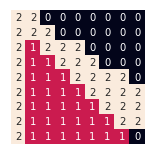

Episode 784	  Score: -2731.80
0.1


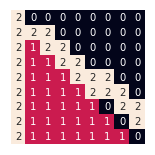

Episode 785	  Score: -2727.00
0.1


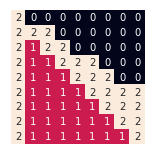

Episode 786	  Score: -2010.20
0.1


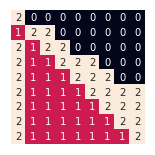

Episode 787	  Score: -2535.20
0.1


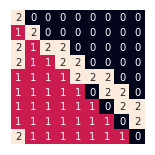

Episode 788	  Score: -1711.80
0.1


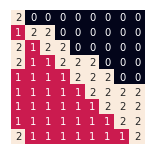

Episode 789	  Score: -2225.80
0.1


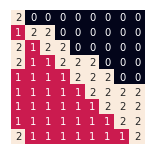

Episode 790	  Score: -2595.60
0.1


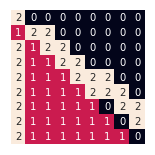

Episode 791	  Score: -2530.40
0.1


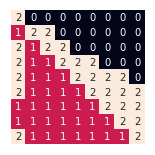

Episode 792	  Score: -2025.40
0.1


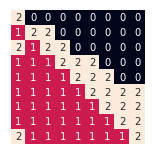

Episode 793	  Score: -3237.60
0.1


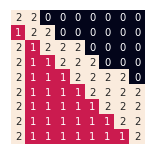

Episode 794	  Score: -2144.80
0.1


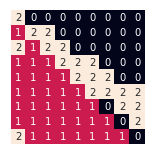

Episode 795	  Score: -2526.40
0.1


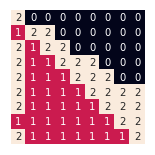

Episode 796	  Score: -2558.60
0.1


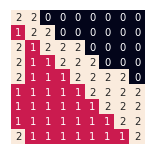

Episode 797	  Score: -1615.60
0.1


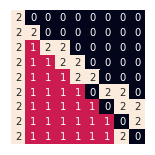

Episode 798	  Score: -2302.60
0.1


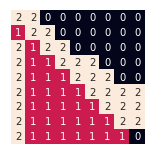

Episode 799	  Score: -2538.60
0.1


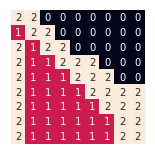

Episode 800	  Score: -2000.00
0.1


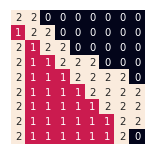

Episode 801	  Score: -3638.40
0.1


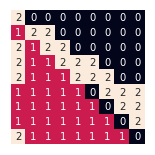

Episode 802	  Score: -2019.40
0.1


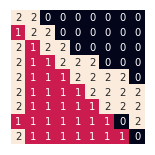

Episode 803	  Score: -2511.40
0.1


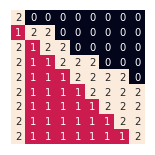

Episode 804	  Score: -2519.20
0.1


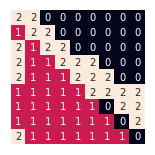

Episode 805	  Score: -3220.20
0.1


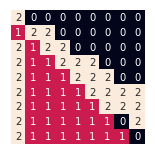

Episode 806	  Score: -2229.20
0.1


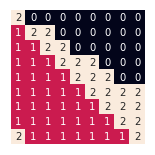

Episode 807	  Score: -1701.40
0.1


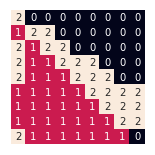

Episode 808	  Score: -2692.60
0.1


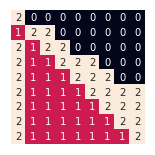

Episode 809	  Score: -2320.00
0.1


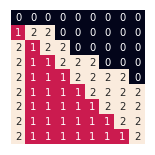

Episode 810	  Score: -1529.20
0.1


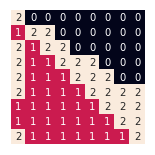

Episode 811	  Score: -2106.60
0.1


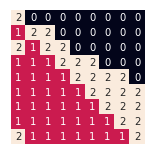

Episode 812	  Score: -2093.20
0.1


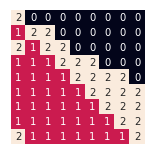

Episode 813	  Score: -2926.60
0.1


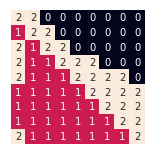

Episode 814	  Score: -2627.40
0.1


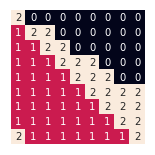

Episode 815	  Score: -2518.80
0.1


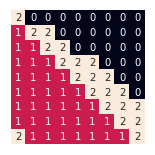

Episode 816	  Score: -1731.80
0.1


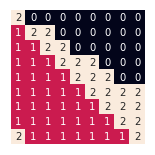

Episode 817	  Score: -1417.60
0.1


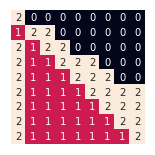

Episode 818	  Score: -3115.60
0.1


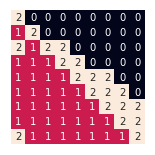

Episode 819	  Score: -2921.20
0.1


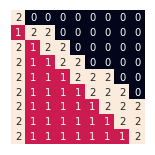

Episode 820	  Score: -3019.20
0.1


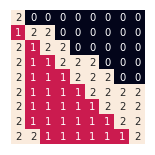

Episode 821	  Score: -2415.20
0.1


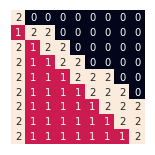

Episode 822	  Score: -2621.20
0.1


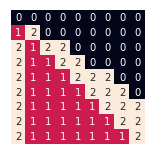

Episode 823	  Score: -3528.80
0.1


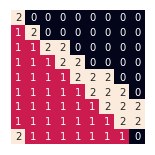

Episode 824	  Score: -2519.60
0.1


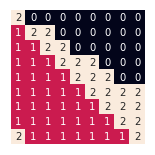

Episode 825	  Score: -2616.00
0.1


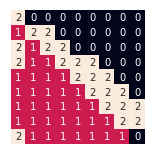

Episode 826	  Score: -1917.40
0.1


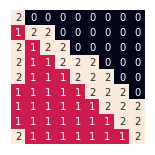

Episode 827	  Score: -3023.40
0.1


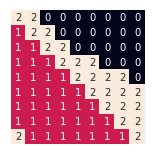

Episode 828	  Score: -3142.00
0.1


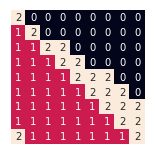

Episode 829	  Score: -3326.60
0.1


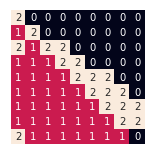

Episode 830	  Score: -3914.80
0.1


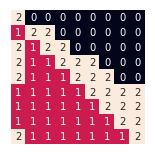

Episode 831	  Score: -2223.40
0.1


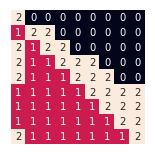

Episode 832	  Score: -2402.20
0.1


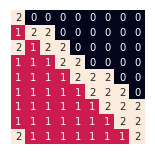

Episode 833	  Score: -3123.20
0.1


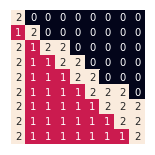

Episode 834	  Score: -3529.80
0.1


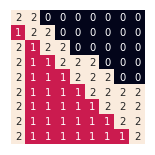

Episode 835	  Score: -3111.20
0.1


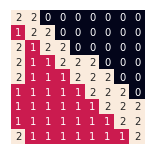

Episode 836	  Score: -2732.00
0.1


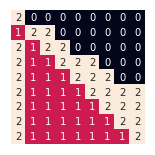

Episode 837	  Score: -2619.00
0.1


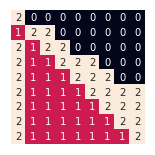

Episode 838	  Score: -3110.00
0.1


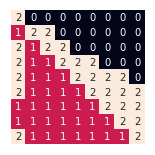

Episode 839	  Score: -2702.20
0.1


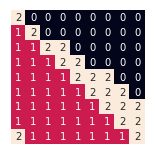

Episode 840	  Score: -2427.60
0.1


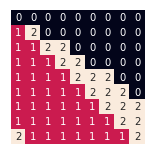

Episode 841	  Score: -3042.00
0.1


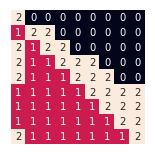

Episode 842	  Score: -3537.60
0.1


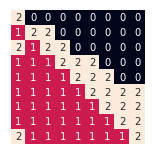

Episode 843	  Score: -2910.40
0.1


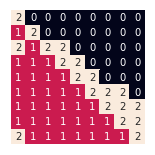

Episode 844	  Score: -2914.40
0.1


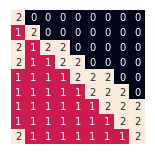

Episode 845	  Score: -2831.40
0.1


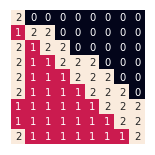

Episode 846	  Score: -2220.20
0.1


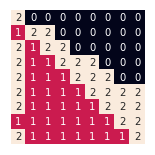

Episode 847	  Score: -1719.20
0.1


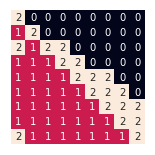

Episode 848	  Score: -4017.80
0.1


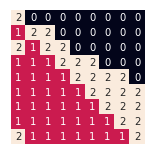

Episode 849	  Score: -2890.60
0.1


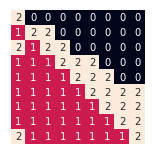

Episode 850	  Score: -1549.20
0.1


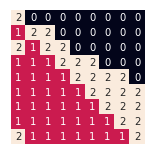

Episode 851	  Score: -2510.20
0.1


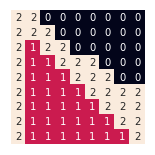

Episode 852	  Score: -2118.20
0.1


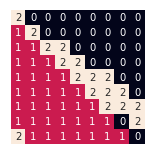

Episode 853	  Score: -2840.20
0.1


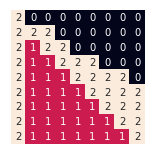

Episode 854	  Score: -2639.00
0.1


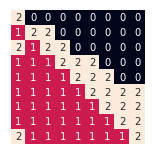

Episode 855	  Score: -3937.40
0.1


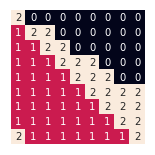

Episode 856	  Score: -3019.20
0.1


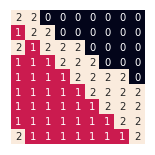

Episode 857	  Score: -1728.20
0.1


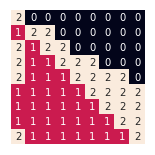

Episode 858	  Score: -3017.60
0.1


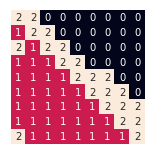

Episode 859	  Score: -2122.80
0.1


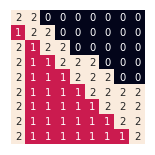

Episode 860	  Score: -2434.40
0.1


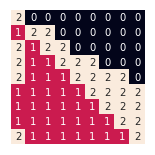

Episode 861	  Score: -3241.40
0.1


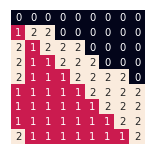

Episode 862	  Score: -2812.40
0.1


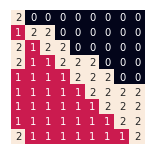

Episode 863	  Score: -1722.20
0.1


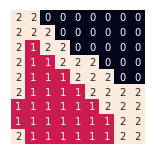

Episode 864	  Score: -2619.40
0.1


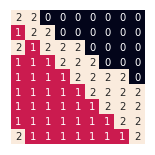

Episode 865	  Score: -2520.00
0.1


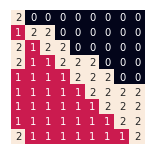

Episode 866	  Score: -1816.40
0.1


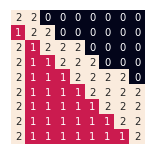

Episode 867	  Score: -2533.00
0.1


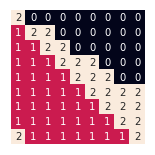

Episode 868	  Score: -2501.00
0.1


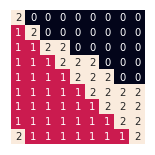

Episode 869	  Score: -2340.40
0.1


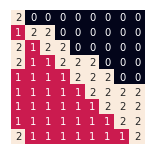

Episode 870	  Score: -2417.60
0.1


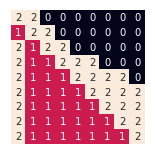

Episode 871	  Score: -2609.80
0.1


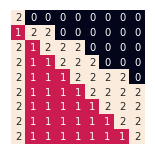

Episode 872	  Score: -2399.80
0.1


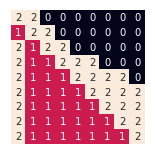

Episode 873	  Score: -2215.20
0.1


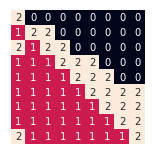

Episode 874	  Score: -2801.40
0.1


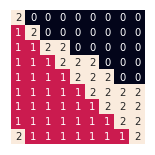

Episode 875	  Score: -2234.80
0.1


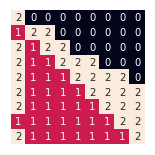

Episode 876	  Score: -2119.00
0.1


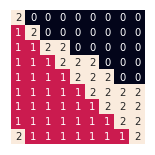

Episode 877	  Score: -3123.60
0.1


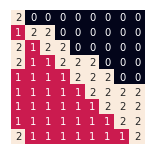

Episode 878	  Score: -2726.00
0.1


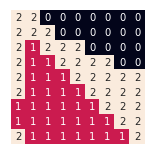

Episode 879	  Score: -2936.20
0.1


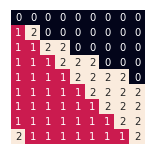

Episode 880	  Score: -2827.40
0.1


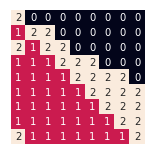

Episode 881	  Score: -2729.00
0.1


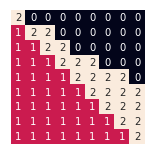

Episode 882	  Score: -2701.00
0.1


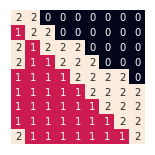

Episode 883	  Score: -2832.20
0.1


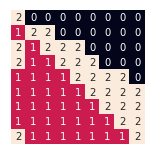

Episode 884	  Score: -2328.40
0.1


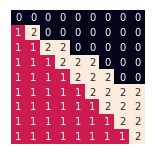

Episode 885	  Score: -3842.60
0.1


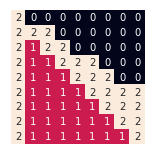

Episode 886	  Score: -2527.60
0.1


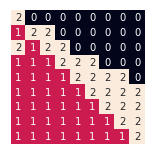

Episode 887	  Score: -2323.20
0.1


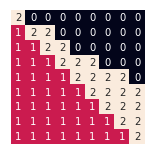

Episode 888	  Score: -2844.40
0.1


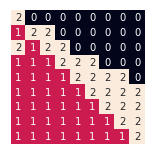

Episode 889	  Score: -3211.80
0.1


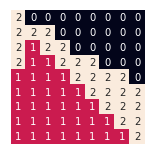

Episode 890	  Score: -3116.00
0.1


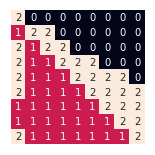

Episode 891	  Score: -2528.40
0.1


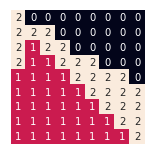

Episode 892	  Score: -3118.40
0.1


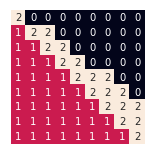

Episode 893	  Score: -2828.00
0.1


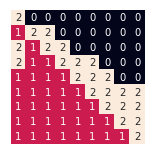

Episode 894	  Score: -4053.00
0.1


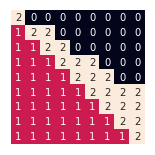

Episode 895	  Score: -2144.40
0.1


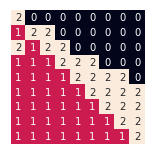

Episode 896	  Score: -2210.00
0.1


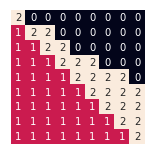

Episode 897	  Score: -2738.80
0.1


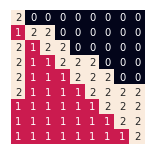

Episode 898	  Score: -3122.20
0.1


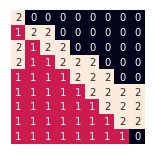

Episode 899	  Score: -2631.80
0.1


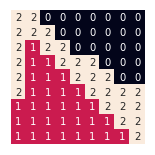

Episode 900	  Score: -2142.60
0.1


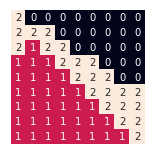

Episode 901	  Score: -2255.60
0.1


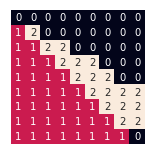

Episode 902	  Score: -3065.40
0.1


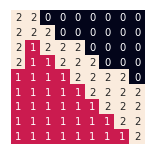

Episode 903	  Score: -2130.40
0.1


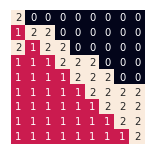

Episode 904	  Score: -2518.60
0.1


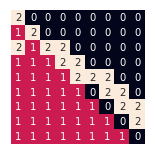

Episode 905	  Score: -2628.20
0.1


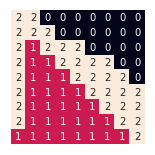

Episode 906	  Score: -2626.00
0.1


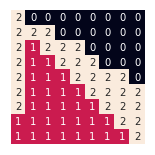

Episode 907	  Score: -2025.00
0.1


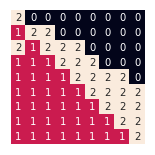

Episode 908	  Score: -2724.20
0.1


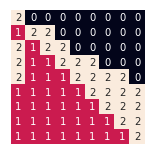

Episode 909	  Score: -2121.20
0.1


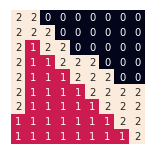

Episode 910	  Score: -2325.60
0.1


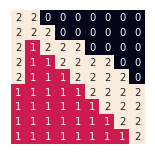

Episode 911	  Score: -3223.00
0.1


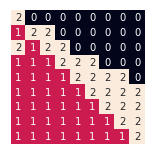

Episode 912	  Score: -3038.60
0.1


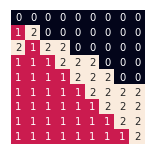

Episode 913	  Score: -2738.40
0.1


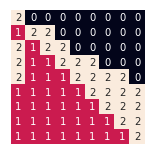

Episode 914	  Score: -3062.20
0.1


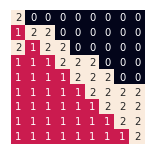

Episode 915	  Score: -2430.60
0.1


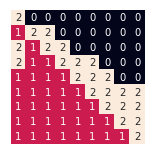

Episode 916	  Score: -3224.60
0.1


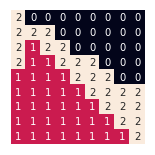

Episode 917	  Score: -2337.20
0.1


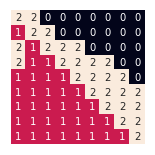

Episode 918	  Score: -2209.20
0.1


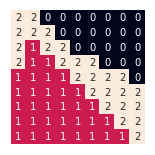

Episode 919	  Score: -2126.80
0.1


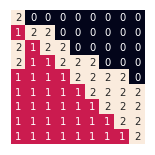

Episode 920	  Score: -3531.60
0.1


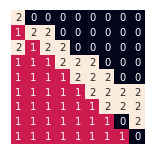

Episode 921	  Score: -1896.40
0.1


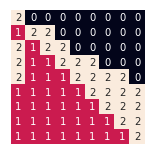

Episode 922	  Score: -2134.80
0.1


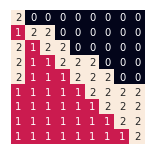

Episode 923	  Score: -1812.80
0.1


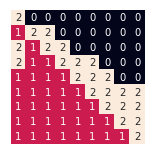

Episode 924	  Score: -2413.40
0.1


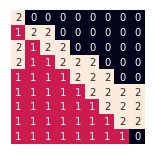

Episode 925	  Score: -1741.80
0.1


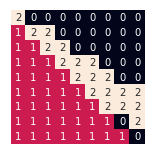

Episode 926	  Score: -2531.00
0.1


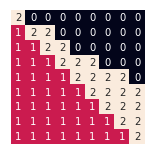

Episode 927	  Score: -1905.20
0.1


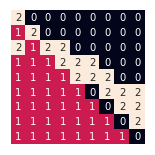

Episode 928	  Score: -3113.40
0.1


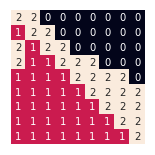

Episode 929	  Score: -2317.40
0.1


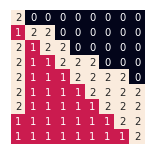

Episode 930	  Score: -1940.20
0.1


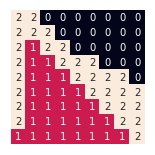

Episode 931	  Score: -2625.00
0.1


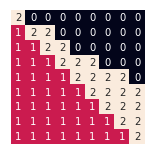

Episode 932	  Score: -3825.00
0.1


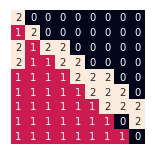

Episode 933	  Score: -2825.20
0.1


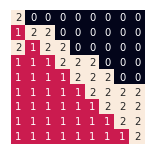

Episode 934	  Score: -2139.00
0.1


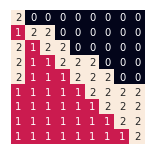

Episode 935	  Score: -2625.00
0.1


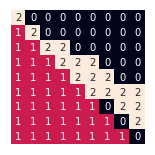

Episode 936	  Score: -3129.60
0.1


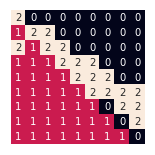

Episode 937	  Score: -1933.00
0.1


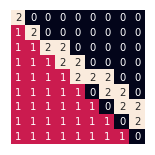

Episode 938	  Score: -2932.80
0.1


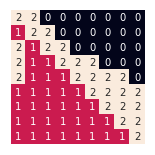

Episode 939	  Score: -2623.00
0.1


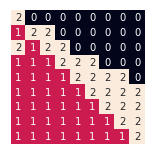

Episode 940	  Score: -2616.20
0.1


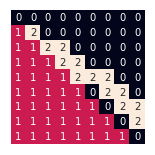

Episode 941	  Score: -2923.40
0.1


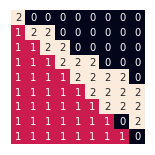

Episode 942	  Score: -2506.20
0.1


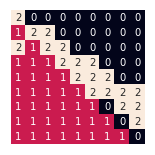

Episode 943	  Score: -2508.60
0.1


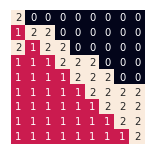

Episode 944	  Score: -1997.40
0.1


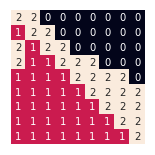

Episode 945	  Score: -2520.80
0.1


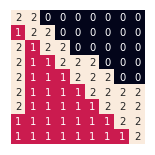

Episode 946	  Score: -2408.40
0.1


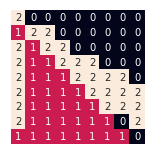

Episode 947	  Score: -2329.40
0.1


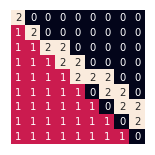

Episode 948	  Score: -1826.00
0.1


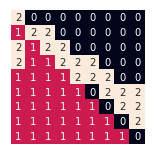

Episode 949	  Score: -3129.40
0.1


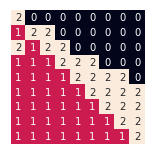

Episode 950	  Score: -3122.20
0.1


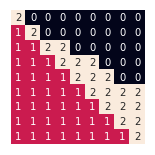

Episode 951	  Score: -2523.00
0.1


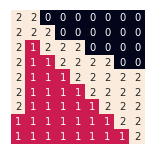

Episode 952	  Score: -2830.60
0.1


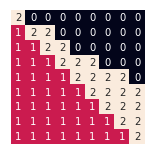

Episode 953	  Score: -2620.20
0.1


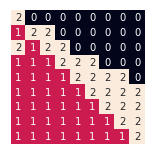

Episode 954	  Score: -3237.20
0.1


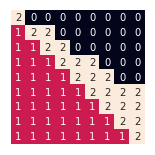

Episode 955	  Score: -3017.60
0.1


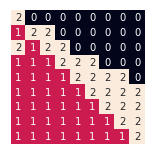

Episode 956	  Score: -3421.60
0.1


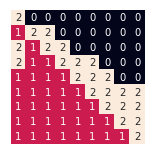

Episode 957	  Score: -2519.60
0.1


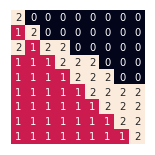

Episode 958	  Score: -2007.40
0.1


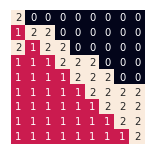

Episode 959	  Score: -2494.80
0.1


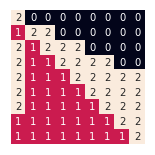

Episode 960	  Score: -2823.80
0.1


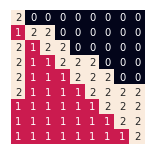

Episode 961	  Score: -1828.20
0.1


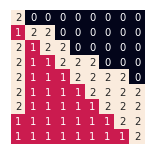

Episode 962	  Score: -3019.80
0.1


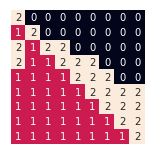

Episode 963	  Score: -2733.20
0.1


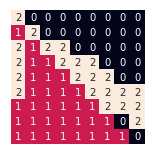

Episode 964	  Score: -3119.00
0.1


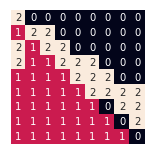

Episode 965	  Score: -1802.60
0.1


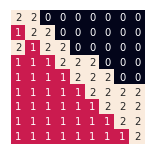

Episode 966	  Score: -1509.40
0.1


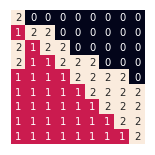

Episode 967	  Score: -2830.20
0.1


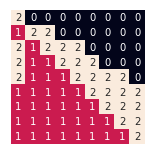

Episode 968	  Score: -2517.20
0.1


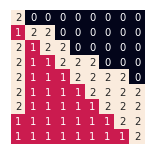

Episode 969	  Score: -3124.40
0.1


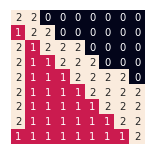

Episode 970	  Score: -2934.00
0.1


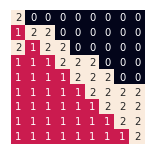

Episode 971	  Score: -3323.00
0.1


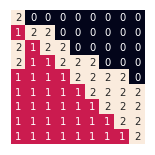

Episode 972	  Score: -3621.60
0.1


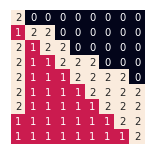

Episode 973	  Score: -2708.80
0.1


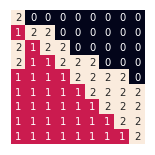

Episode 974	  Score: -2723.80
0.1


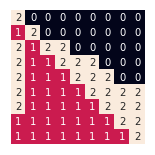

Episode 975	  Score: -3113.60
0.1


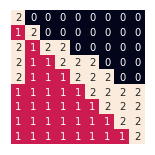

Episode 976	  Score: -2636.60
0.1


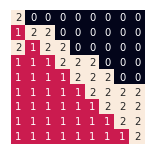

Episode 977	  Score: -2345.80
0.1


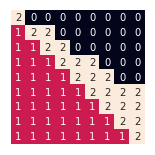

Episode 978	  Score: -2620.60
0.1


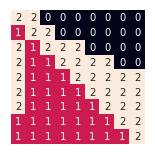

Episode 979	  Score: -3725.20
0.1


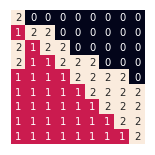

Episode 980	  Score: -2597.40
0.1


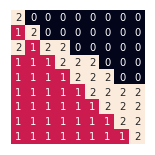

Episode 981	  Score: -2429.00
0.1


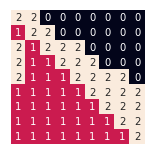

Episode 982	  Score: -2217.60
0.1


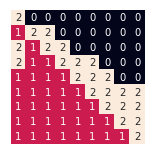

Episode 983	  Score: -2592.60
0.1


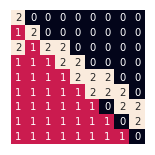

Episode 984	  Score: -3229.00
0.1


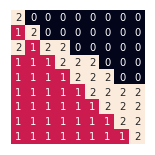

Episode 985	  Score: -2917.20
0.1


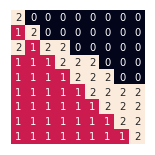

Episode 986	  Score: -3027.80
0.1


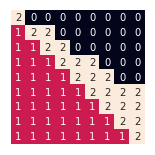

Episode 987	  Score: -2907.20
0.1


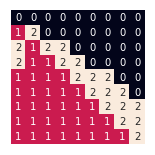

Episode 988	  Score: -2115.20
0.1


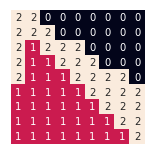

Episode 989	  Score: -3225.40
0.1


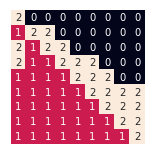

Episode 990	  Score: -2513.00
0.1


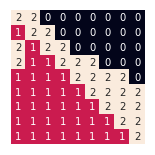

Episode 991	  Score: -1406.00
0.1


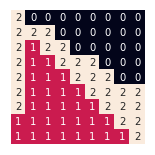

Episode 992	  Score: -2710.80
0.1


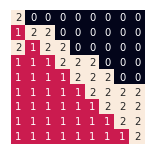

Episode 993	  Score: -2314.40
0.1


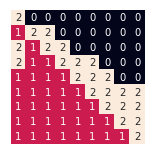

Episode 994	  Score: -2209.60
0.1


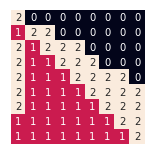

Episode 995	  Score: -2201.60
0.1


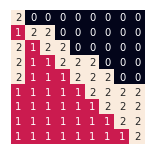

Episode 996	  Score: -3127.40
0.1


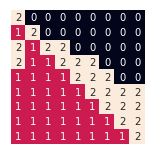

Episode 997	  Score: -3130.20
0.1


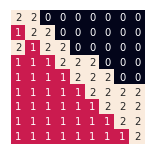

Episode 998	  Score: -2520.80
0.1


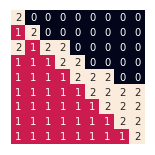

Episode 999	  Score: -2322.00
0.1


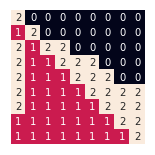

Episode 1000	  Score: -2342.00
0.1


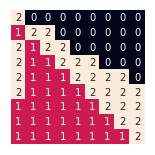

Episode 1001	  Score: -3136.40
0.1


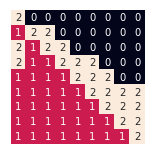

Episode 1002	  Score: -2424.00
0.1


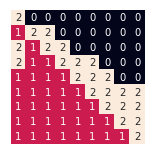

Episode 1003	  Score: -2699.20
0.1


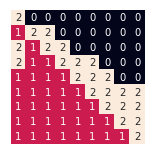

Episode 1004	  Score: -2882.00
0.1


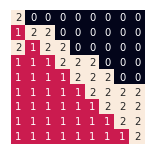

Episode 1005	  Score: -1823.00
0.1


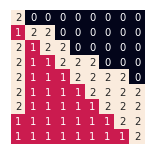

Episode 1006	  Score: -2126.80
0.1


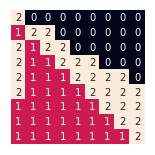

Episode 1007	  Score: -1709.00
0.1


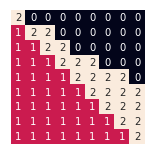

Episode 1008	  Score: -2922.60
0.1


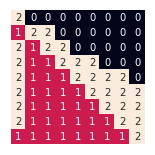

Episode 1009	  Score: -1920.00
0.1


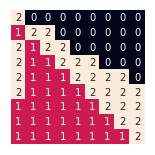

Episode 1010	  Score: -1807.20
0.1


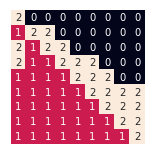

Episode 1011	  Score: -2516.00
0.1


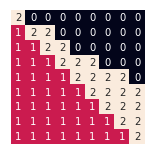

Episode 1012	  Score: -2513.20
0.1


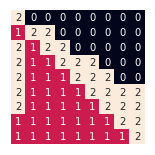

Episode 1013	  Score: -2432.60
0.1


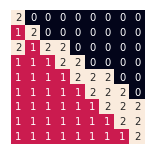

Episode 1014	  Score: -2236.80
0.1


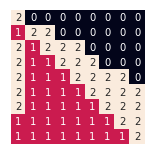

Episode 1015	  Score: -2527.60
0.1


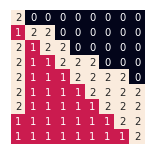

Episode 1016	  Score: -3217.60
0.1


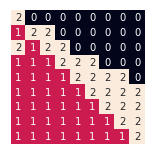

Episode 1017	  Score: -2317.60
0.1


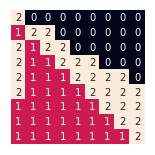

Episode 1018	  Score: -3219.80
0.1


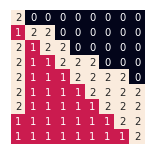

Episode 1019	  Score: -2435.00
0.1


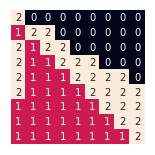

Episode 1020	  Score: -3101.40
0.1


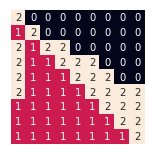

Episode 1021	  Score: -2214.80
0.1


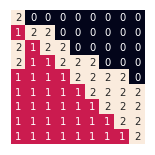

Episode 1022	  Score: -2204.20
0.1


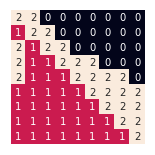

Episode 1023	  Score: -2527.40
0.1


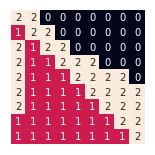

Episode 1024	  Score: -2811.00
0.1


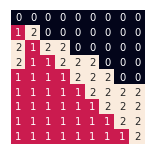

Episode 1025	  Score: -1628.00
0.1


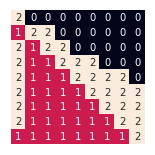

Episode 1026	  Score: -1834.20
0.1


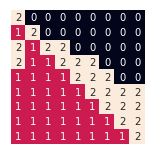

Episode 1027	  Score: -3121.80
0.1


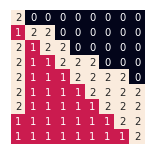

Episode 1028	  Score: -2333.20
0.1


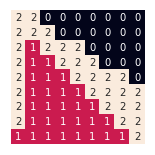

Episode 1029	  Score: -3212.60
0.1


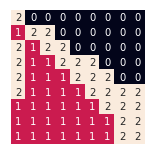

Episode 1030	  Score: -2420.60
0.1


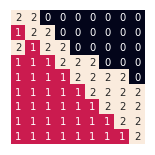

Episode 1031	  Score: -2334.00
0.1


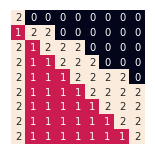

Episode 1032	  Score: -2510.80
0.1


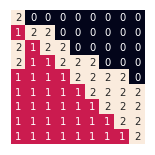

Episode 1033	  Score: -3510.40
0.1


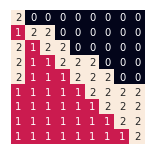

Episode 1034	  Score: -2206.60
0.1


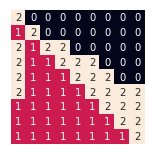

Episode 1035	  Score: -3125.00
0.1


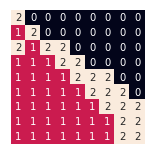

Episode 1036	  Score: -2506.20
0.1


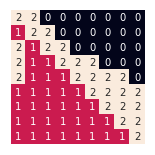

Episode 1037	  Score: -2007.40
0.1


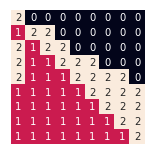

Episode 1038	  Score: -2014.40
0.1


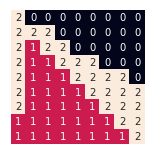

Episode 1039	  Score: -2724.60
0.1


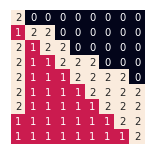

Episode 1040	  Score: -3418.80
0.1


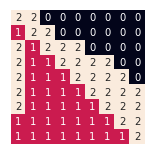

Episode 1041	  Score: -1828.00
0.1


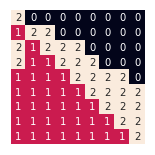

Episode 1042	  Score: -2720.60
0.1


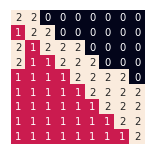

Episode 1043	  Score: -3511.60
0.1


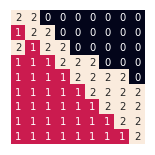

Episode 1044	  Score: -2429.00
0.1


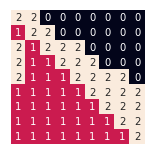

Episode 1045	  Score: -1716.40
0.1


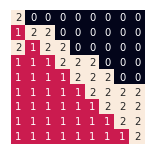

Episode 1046	  Score: -3227.80
0.1


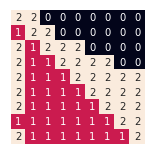

Episode 1047	  Score: -2627.80
0.1


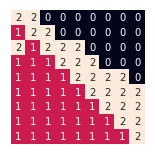

Episode 1048	  Score: -1927.40
0.1


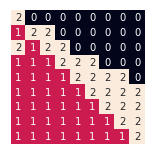

Episode 1049	  Score: -2416.40
0.1


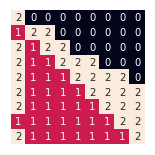

Episode 1050	  Score: -2334.20
0.1


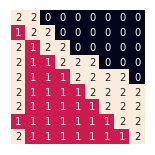

Episode 1051	  Score: -2139.00
0.1


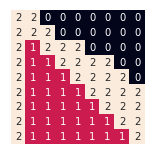

Episode 1052	  Score: -3236.80
0.1


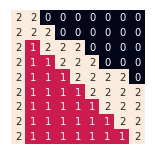

Episode 1053	  Score: -1807.80
0.1


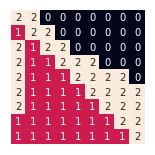

In [ ]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward = env.takeAction(action)
            agent.step(state, action, reward, next_state)
            state = next_state
            score += reward
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\t  Score: {:.2f}'.format(i_episode, np.mean(score)))
        print(eps)
        # plot 
        policy = agent.extractPolicy()
        f, ax = plt.subplots(figsize=(3,3))
        ax.imshow(policy)
        ax = sns.heatmap(policy, annot=True)
        cb = ax.collections[-1].colorbar   
        cb.remove()
        plt.xticks([])
        plt.yticks([])
        plt.show()
    return scores

scores = dqn()

In [6]:
state = torch.from_numpy(np.asarray([1, 0])).float().unsqueeze(0).to("cpu")
agent.qnetwork_local.eval()
with torch.no_grad():
    action_values = agent.qnetwork_local(state)

In [7]:
action_values

tensor([[-1.2960, -0.7286, -0.6110]])

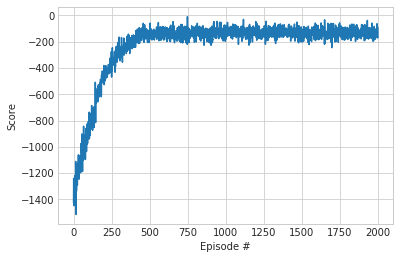

In [12]:
# plot the scores
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
np.mean(scores[500:])

-133.21598928324383

In [30]:
0.35*1000 * (1 - rho) - rho * 0.35*1000

-72.28469848632812